In [1]:
#ref1 : https://maartengr.github.io/BERTopic/getting_started/hierarchicaltopics/hierarchicaltopics.html#merge-topics
#ref2 : https://medium.com/@AmyGrabNGoInfo/hierarchical-topic-model-for-airbnb-reviews-f772eaa30434
#ref3 : https://towardsdatascience.com/hierarchical-topic-modeling-with-bigartm-library-6f2ff730689f

# Real Data

## import data

In [2]:
from bertopic import BERTopic
from pymongo import MongoClient
import pandas as pd
from pprint import pprint
import warnings
from tqdm import tqdm
# Filter out the DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Asus\AppData\Local\Programs\Python\Python311\

In [3]:
try:
    client = MongoClient('mongodb://192.168.1.103:27017/')

    print("---Connenction Successful---")

    Recommendation_elderly = client['Recommendation_elderly']

    healthcare_articles = Recommendation_elderly['token']

except:
    print("Connection Fail")

---Connenction Successful---


In [4]:
data = healthcare_articles.find()
data = pd.DataFrame(list(data))
data = data.drop_duplicates(subset=['url'])
data = data[data['title'] != '']
data = data.reset_index().drop(columns=['index'])
data = data.reset_index().drop(columns=['_id','index'])
data

url   
0     https://www.rama.mahidol.ac.th/ramachannel/art...  \
1     https://www.rama.mahidol.ac.th/ramachannel/art...   
2     https://www.rama.mahidol.ac.th/ramachannel/art...   
3     https://www.rama.mahidol.ac.th/ramachannel/art...   
4     https://www.rama.mahidol.ac.th/ramachannel/art...   
...                                                 ...   
4766  https://www.chulabhornchannel.com/news-activit...   
4767  https://www.chulabhornchannel.com/health-artic...   
4768  https://www.chulabhornchannel.com/news-activit...   
4769  https://www.chulabhornchannel.com/health-artic...   
4770  https://www.chulabhornchannel.com/health-artic...   

                                                  title   
0     ภาวะลองโควิด (long covid) เป็นแล้วหายไหม วิธีส...  \
1     โรคมือ เท้า ปาก โรคระบาดที่มากับฝน อาการและวิธ...   
2     มีวิธีรักษาและดูแลตัวเองเมื่อเป็นไข้เลือดออกอย...   
3     รู้ทันสัญญาณเตือนอาการของโรคไข้เลือดออกพร้อมวิ...   
4           สัมภาษณ์ชัชชาติ เจาะ Life Style กับหมอรามาฯ   
...                                                 ...   
4766  อร่อยปาก ลำบากท้อง อาหารเป็นพิษ ลำไส้อักเสบโรค...   
4767           วิธีการเช็ดตา หลังผ่าตัดตา เมื่อกลับบ้าน   
4768  CRA COVID-19 Chronicle  บันทึกเหตุการณ์โควิด-1...   
4769              รู้เท่ารู้ทัน PM2.5 พาโรคอะไรมาด้วย ?   
4770  Modernization of Thailand Health Technology As...   

                                                content         category   
0     ภาวะลองโควิด (long covid) เป็นแล้วหายไหม วิธีส...              NaN  \
1     โรคมือ เท้า ปาก โรคระบาดที่มากับฝน อาการและวิธ...              NaN   
2     มีวิธีรักษาและดูแลตัวเองเมื่อเป็นไข้เลือดออกอย...              NaN   
3     รู้ทันสัญญาณเตือนอาการของโรคไข้เลือดออกพร้อมวิ...              NaN   
4     สัมภาษณ์ชัชชาติ เจาะ Life Style กับหมอรามาฯ Au...              NaN   
...                                                 ...              ...   
4766  FacebookTwitterLine อร่อยปาก ลำบากท้อง อาหารเป...  health-articles   
4767                                FacebookTwitterLine  health-articles   
4768  FacebookTwitterLine CRA COVID-19 Chronicle บัน...  health-articles   
4769                                FacebookTwitterLine  health-articles   
4770  FacebookTwitterLine Modernization of Thailand ...  health-articles   

            owner source                                             banner   
0                    NaN                                                NaN  \
1                    NaN                                                NaN   
2                    NaN                                                NaN   
3                    NaN                                                NaN   
4                    NaN                                                NaN   
...                  ...                                                ...   
4766  chulabhorn channel  https://www.chulabhornchannel.com/wp-content/u...   
4767  chulabhorn channel  https://www.chulabhornchannel.com/wp-content/u...   
4768  chulabhorn channel  https://www.chulabhornchannel.com/wp-content/u...   
4769  chulabhorn channel  https://www.chulabhornchannel.com/wp-content/u...   
4770  chulabhorn channel  https://www.chulabhornchannel.com/wp-content/u...   

                                                  image   
0                                                   NaN  \
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
4766  [https://www.chulabhornchannel.com/wp-content/...   
4767                                                 []   
4768  [https://www.chulabhornchannel.com/wp-content/...   
4769                                                 []   
4770  [https://www.chulabhornchannel.com/wp-content/...   

                                             text_token  
0    

## cleaning

In [5]:
from pprint import pprint
from tqdm import tqdm
import pandas as pd
import re
import string
import unicodedata
pd.options.mode.chained_assignment = None
translator = str.maketrans('', '', string.punctuation)
from pythainlp.corpus import thai_stopwords
from pythainlp.corpus.common import thai_words
import deepcut
from pythainlp.util import normalize
from pythainlp.corpus import thai_stopwords
from attacut import tokenize, Tokenizer
from nltk.corpus import stopwords

In [6]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
sensitive_words = '''วิตามินบี1 วิตามินบี2 วิตามินบี3 วิตามินบี5 วิตามินบี6 วิตามินบี7 วิตามินบี9 วิตามินบี12 วิตามินเอ วิตามินดี วิตามินอี วิตามินเค 
วิตามินซี โอเมก้า3 โอเมก้า6 โอเมก้า9 VitaminA VitaminD VitaminE VitaminK VitaminC Omega3 Omega6 Omega9 วิตามินA วิตามินD วิตามินE วิตามินK วิตามินB1 
วิตามินB2 วิตามินB3 วิตามินB5 วิตามินB6 วิตามินB7 วิตามินB9 วิตามินB12 คอลเลสเตอรอล บลอกโคลี ผักใบเขียว ผักคะน้า ผักกวางตุ้ง น้ำมันรำข้าว ออกซิเจน 
มะม่วงหาวมะนาวโห่ โฮลเกรน ถั่วเปลือกแข็ง ถั่วแขก ถั่วพู ถั่วฝักยาว ถั่วแปบ ถั่วเหลือง ถั่วปากอ้า ถั่วลันเตา ถั่วแดง ถั่วดำน้ำตาล น้ำปลา เนื้อแดง กะหล่ำปลี เรตินา โรค ลูทีน 
ผักผลไม้ สีเหลือง ไขมันทรานซ์ การสูบบุหรี่ ซีแซนทีน สารลูทีน สารต้านอนุมูลอิสระ น้ำมันรำข้าว น้ำมันเมล็ดชา ยำปลาทู ผัดผักบุ้ง ต้มเลือดหมู ปลากระพง ปลากระพงนึ่ง 
แกงส้มผักเลียง น้ำพริกมะขาม ผักลวก ปลาทับทิม กล้วยบวดชี ถั่วเขียวต้มน้ำตาล ถั่วแดงเย็น ไขมันอิ่มตัว น้ำมันมะพร้าว ขนมอบ อาหารทอด อาหารฟาสต์ฟู้ด ซีเรียล โฮลวิท หัวบุก 
แมคคาเดเมีย ปลาทะเล ปลานิล ปลาสวาย แก้วมังกร ปลาแซลมอน ปลาซา์ดีน น้ำมันพืช น้ำมันดอกคำฝอย น้ำมันคาโนลา ใยอาหาร รำข้าว แอพริคอท บรอกโคลี กีวี่ ผัดผัก 
ไก่ย่างติดหนัง นมพร่องมันเนย นมสด ผลไม้รสหวาน เนื้อสัตว์ติดมัน น้ำมันคาโนล่า ลูกพีช เนื้อสัตว์ติดไขมัน ไก่ติดหนัง เนื้อแดง คอลเรสเตอรอล เครื่องดื่มแอลกอฮอล์ ไตรกลีเซอร์ไรด์ 
ผักดอง ขาหมู หมูสามชั้น หนังไก่ทอด เครื่องในสัตว์ ผักผลไม้ดอง ไข่เค็ม น้ำซุป เครื่องปรุงรส น้ำขิง ข้าวต้มปลา ขนมปังโอลวีต เบอร์รี่ โพรไบโอติก ลูกพรุน อาร์ติโชค บร๊อคโคลี่ 
บล็อกโคลี โพรไปโอติกส์ ต้มข่าไก่ แกงกะทิ แกงแพนง เบเกอรี่ เฟรนช์ฟรายด์ ครีมเทียม หมูติดมัน แกงกะหรี่ สันคอหมู แอลกอฮอร์ แกงกะทิ ผัดไท หอยทอด ผัดซีอิ๊ว ดอกคำฝอย 
ปลาซาบะ พริกหวาน เมล็ดแฟล็ก เชอเบท ปลาโอ ไก่ชุบแป้งทอด ปลาทอดชุบแป้ง แกงเหลือง ปลานึ่ง มะเขือเผา เครื่องดื่มแอลกอฮอล์ เครื่องดื่มคาเฟอีน เครื่องดื่มประเภทชากาแฟ 
เครื่องดื่มแอลกฮอล์ เครื่องดื่มสมุนไพร เครื่องดื่มผสมแอลกอฮอล์ vitaminc vitamine น้ำตาล น้ำเกรวี่ น้ำตาล น้ำมะนาว น้ำมะพร้าว น้ำปั่น น้ำหล่อลื่น น้ำผัก น้ำลูกยอ น้ำเกรวี 
น้ำเกาเหลา น้ำเชื่อม น้ำแป้ง น้ำมันปาล์ม เครื่องดื่มคาเฟอีน เครื่องดื่มประเภท แอลกอฮอล์ เนื้อสัตว์ บี6 บี12 ไข่แดง จมูกข้าว ผักโขม ธาตุเหล็ก น้ำมัน ปลาทูน่า ปลาน้ำจืด 
ปลาดุก ปลาช่อน ปลาจะละเม็ด สาหร่ายทะเล เมล็ดเซีย เมล็ดฟักทอง น้ำมันมะกอก น้ำมันทานตะวัน ไขมันดี ไขมันเลว ข้าวกล้อง จมูกข้าวสาลี กล้วย นม นมถั่วเหลือง ไขมันต่ำ 
อนุมูลอิสระ งด ไขมันที่ดี เนื้อสัตว์ไขมันต่ำ งา ข้าวโอ๊ต ปลาแม็คคลอเรล ปลาซาร์ดีน ปลากะพงขาว ปลาทู ปลาสลิด ปลาตะเพียน เต้าหู้ เนื้อสัตว์แปรรูป เนื้อสัตว์ที่ผ่านกระบวนการ โซเดียมสูง
ไส้กรอก หมูยอ ปลาเค็ม ถั่วเมล็ดแห้ง โควิด longcovid ลองโควิด มะเร็ง covid วัคซีน อีโบลา พิชิต ข้าว ตา หัวใจ longcovid ไวรัสโคโรนา มือเท้าปาก ขาอยู่ไม่สุข ต้อกระจก แพทย์แผนจีน
หยุดหายใจขณะหลับ ข้อเข่าเสื่อม ขากระตุกขณะหลับ นอนไม่หลับ พังผืดใต้ฝ่าเท้า ตกขาว ไม่ปกติ ประจำเดือน ง่วงนอน มาก น้ำตาล การออกกำลังกาย ติดเชื้อในปอด มะเร็ง อย่างไร เคมีบำบัด 
เต้านม เรียนonline ภูมิแพ้ จมูกอักเสบ ตรวจภายใน เสมหะ officesyndrome การล้าง เลือกซื้อ ปลอดภัย ลดความเสี่ยง สารเคมีตกค้าง สุขภาพดี ลด หวาน ผู้สูงอายุ กินยาก ไข้เลือดออก 
ไข้หวัดใหญ่ ท้องผูก ตับอักเสบเอ ก่อนมี ตัวอ่อน มีบุตรยาก ความดันต่ำ แท้ง คุมกำเนิด ไข่ปลาอุก embryoglue ผิวเสีย ปากมดลูก ผู้หญิง ข้อเข่า ลูก แพ้ นมแม่ รังไข่ ถุงน้ำ มะเร็ง เตือน
กระเพาะอาหาร'''.lower().replace('\n','').split(' ')
sensitive_words = list(set(sensitive_words))

In [8]:
def deepcut_tokenizer(text):
    cleanedText = "".join([i for i in text if i not in string.punctuation]).lower()
    cleanedText = normalize(unicodedata.normalize('NFKD', cleanedText).replace('\n','').replace('\r','').replace('\t','').replace('“','').replace('”','').replace('.','').replace('–','').replace('‘','').replace('’','').replace('ํา','ำ').replace('...','').replace(',','').replace( 'ี','ี'))
    #cleanedText = re.sub(r'\d+', '', cleanedText)
    cleanedText = deepcut.tokenize(cleanedText,custom_dict=sensitive_words)
    #stopwords = list(thai_stopwords())+'EMagazine GJ international bangkok hospital'.lower().split(' ')
    stopwords = 'EMagazine GJ international bangkok hospital'.lower().split(' ')
    cleanedText = [i for i in cleanedText if i not in stopwords]
    cleanedText = [i.replace(' ','') for i in cleanedText if len(i) != 1 and len(i) !=0]
    cleanedText = ','.join(cleanedText)
    return cleanedText

In [9]:
text = """ภาวะลองโควิด (long covid) เป็นแล้วหายไหม วิธีสังเกตและการรักษาภาวะลองโควิด (long covid) เป็นแล้วหายไหม 
วิธีสังเกตและการรักษา October 28, 2022 1 min read 7 A Decrease font size. A Reset font size. A Increase font size. 
ผู้ป่วยที่หายจากโควิด-19 อาจรู้สึกกังวลว่าตัวเองกำลังเป็นลองโควิดหรือไม่ เมื่อพบว่าสุขภาพร่างกายไม่ปกติเหมือนก่อนเป็นโรค 
เช่น รู้สึกเหนื่อยกว่าปกติ หายใจเหนื่อย ไอเรื้อรัง อ. พญ.รพีพรรณ รัตนวงศ์นรา มอร์ด สาขาวิชาโรคติดเชื้อ ภาควิชาอายุรศาสตร์ 
คณะแพทยศาสตร์โรงพยาบาลรามาธิบดี มหาวิทยาลัยมหิดล ได้ตอบข้อสงสัยเกี่ยวกับภาวะลองโควิด จะทราบได้อย่างไรว่าเป็นลองโควิด ลองโควิด 
ต้องไม่ใช่ ภายใน 1 เดือน ต้องหายจากโควิด และ มีอาการต่อเนื่องอย่างน้อย 2 เดือน ต้องแยกว่าไม่ได้เป็นโรคอื่นที่เป็นมาก่อนเป็นโควิด เช่น 
โรคหัวใจ โรคปอด นอนไม่หลับ บางคนไม่เคยหาหมอเลย แต่เมื่อเป็นโควิดแล้วได้ตรวจ จึงได้พบว่าเป็นโรคอื่นมาก่อนแล้ว อาการที่อาจเป็นลองโควิด 
ผู้ป่วยอาจมีอาการเหนื่อย ไอ ซึ่งมักเกี่ยวข้องกับระบบทางเดินหายใจส่วนบน ต้องตรวจการทำงานของหัวใจ ปอด ในเบื้องต้น ว่ามีการทำงานผิดปกติหรือไม่ เช่น 
การเจาะเลือด การทำคลื่นไฟฟ้าหัวใจ คนไข้กลุ่มไหนที่ควรมาพบแพทย์ คนไข้ที่มีอาการเยอะ เช่น นอน ICU ใช้เครื่องช่วยหายใจ หรือเป็นผู้ที่อยู่ในกลุ่มเสี่ยง เช่น 
คนที่มีอายุมาก มีโรคอ้วน โรคประจำตัว จะนัดมาเจอหมออย่างน้อย 1 ครั้งต่อ 1 เดือน อาการเริ่มต้นตอนเป็นโควิดกับลองโควิดสัมพันธ์กันหรือไม่ ส่วนใหญ่จะสัมพันธ์กัน 
จากข้อมูลในประเทศอิตาลีและอเมริกา พบว่า ผู้ป่วยที่เป็นโควิดและรักษาตัวอยู่ที่บ้านมีโอกาสเป็นลองโควิด 10-15% ภาวะ MIS-C กับ ลองโควิด ต่างกันอย่างไร ภาวะ MIS-C 
(Multisystem Inflammatory Syndrome in Children) เป็นภาวะการอักเสบภายในร่างกายของเด็ก หากเป็นในผู้ใหญ่ จะเรียกว่า MIS-A (Multisystem Inflammatory 
Syndrome in Adult) ต่างจากลองโควิดตรงที่หลังจากที่ผู้ป่วยหายจากโควิด-19 จะมีอาการอักเสบค่อนข้างเยอะ ทำให้ร่างกายเกิดการติดเชื้อขึ้นอีกครั้ง เช่น ทำให้มีอาการเหนื่อยหอบ 
ผื่น ตับและไตอักเสบ ซึ่งอาจจะต้องรักษาโดยการรับประทานยากดภูมิ ในขณะที่ลองโควิด อาการของโรคจะยังคงมีอยู่ต่อเนื่อง แต่อาจจะไม่รุนแรงมากนัก ไม่แน่ใจว่าเป็นลองโควิด 
ต้องตรวจร่างกายเยอะไหม ไม่จำเป็น การซักประวัติตรวจร่างกายและดูปัจจัยเสี่ยงมีความสำคัญ หากไม่แน่ใจว่าเป็นลองโควิดหรือไม่ อาจรับประทานยาทั่วไปเพื่อบรรเทาอาการไปก่อน 
เช่น ยาแก้ไอ ยาคลายกังวล หรือการรักษาด้วยวิธีอื่น ๆ เช่น การทำสมาธิ การฟังเพลงบำบัด ลองโควิดอันตรายถึงชีวิตหรือไม่ แทบไม่มีการรายงาน 
แต่มักจะเกิดจากโรคแทรกซ้อนที่เกิดหลังการติดโควิด-19 มากกว่า ความเชื่อเกี่ยวกับลองโควิด ฉีดวัคซีนทำให้เป็นลองโควิด ไม่จริง 
มีการศึกษาพบว่าคนที่ไม่ฉีดวัคซีนมีโอกาสเป็นลองโควิดมากกว่าคนที่ได้รับการฉีดวัคซีนป้องกันโควิด-19 เป็นลองโควิดห้ามออกกำลังกาย ไม่จริง แต่ควรออกกำลังกายเท่าที่ไหว 
เช่น การเดิน 15-20 นาทีต่อวัน หากเหนื่อยให้หยุดพัก และค่อย ๆ เพิ่มระยะเวลาเมื่อร่างกายมีความทนทานมากขึ้น รับประทานนมเปรี้ยวช่วยให้หายจากการเป็นลองโควิดได้เร็วขึ้น 
ไม่จริง ยังไม่มีการศึกษาว่ารับประทานนมเปรี้ยวแล้วจะช่วยให้หายจากการเป็นลองโควิดได้เร็วขึ้น มีอาการปวดข้อ ปวดเข่า เกิดจากลองโควิด เป็นไปได้ 
แต่ส่วนใหญ่มักเกิดจากจากโรคข้อเข่าที่เป็นอยู่ก่อนแล้ว เพียงแต่ไม่เคยรับการตรวจวินิจฉัยมาก่อน เลือดบางกรุ๊ปมีโอกาสเป็นลองโควิดมากกว่ากรุ๊ปเลือดอื่น ไม่จริง การศึกษาหลาย ๆ 
ประเทศ ยังไม่พบว่ากรุ๊ปเลือดมีผลต่อการเป็นลองโควิด ลองโควิดเป็นแล้วหายได้ ผู้ป่วยไม่จำเป็นต้องมาหาหมอเพื่อตรวจร่างกายหากมีอาการไม่มาก แต่สำหรับคนที่อยู่ในกลุ่มเสี่ยง เช่น 
ผู้ป่วยที่นอน ICU ใช้เครื่องช่วยหายใจ คนที่มีอายุมาก มีโรคอ้วน โรคประจำตัว ก็สามารถมาพบหมอได้ เพื่อตรวจคัดกรองอีกที\xa0 อย่างไรก็ตาม อ. พญ.รพีพรรณ รัตนวงศ์นรา มอร์ด 
ให้คำแนะนำว่า แม้สถานการณ์การแพร่ระบาดจะลดลง รวมถึงมาตรการต่าง ๆ ได้รับการผ่อนปรนมากขึ้น แต่ก็ไม่ควรประมาท การ์ดอย่าตก 
เพราะการเป็นลองโควิดทำให้เราใช้ชีวิตอย่างยากลำบากมากขึ้น ดังนั้นการป้องกันที่ดีที่สุด คือการใส่หน้ากากอนามัยเมื่ออยู่ในที่ชุมชน หมั่นล้างมืออย่างสม่ำเสมอ 
ก็จะช่วยให้เราห่างไกลจากโรคไวรัสโควิด-19 และภาวะลองโควิดได้ ข้อมูลโดย อ. พญ.รพีพรรณ รัตนวงศ์นรา มอร์ด สาขาวิชาโรคติดเชื้อ ภาควิชาอายุรศาสตร์ 
คณะแพทยศาสตร์โรงพยาบาลรามาธิบดี มหาวิทยาลัยมหิดล ตรวจโควิด19 ลองโควิด LONG COVID อาการลองโควิด วิธีรักษา ลองโควิด การป้องกัน โควิด 0"""

In [10]:
deepcut_tokenizer(text)

120/120 [==============================] - 1s 5ms/step


'ภาวะ,ลองโควิด,long,covid,เป็น,แล้ว,หาย,ไหม,วิธี,สังเกต,และ,การ,รักษา,ภาวะ,ลองโควิด,long,covid,เป็น,แล้ว,หาย,ไหม,วิธี,สังเกต,และ,การ,รักษา,october,28,2022,min,read,decrease,font,size,reset,font,size,increase,font,size,ผู้,ป่วย,ที่,หาย,จาก,โควิด,19,อาจ,รู้สึก,กังวล,ว่า,ตัว,เอง,กำลัง,เป็น,ลองโควิด,หรือ,ไม่,เมื่อ,พบ,ว่า,สุขภาพ,ร่างกาย,ไม่ปกติ,เหมือน,ก่อน,เป็น,โรค,เช่น,รู้สึก,เหนื่อย,กว่า,ปกติ,หายใจ,เหนื่อย,ไอ,เรื้อรัง,พญรพีพรรณรัตนวงศ์นรามอร์ด,สาขา,วิชา,โรค,ติด,เชื้อ,ภาค,วิชาอายุรศาสตร์,คณะแพทยศาสตร์โรงพยาบาลรามาธิบดี,มหาวิทยาลัยมหิดล,ได้,ตอบ,ข้อ,สงสัย,เกี่ยว,กับ,ภาวะ,ลองโควิด,จะ,ทราบ,ได้,อย่างไร,ว่า,เป็น,ลองโควิด,ลองโควิด,ต้อง,ไม่,ใช่,ภาย,ใน,เดือน,ต้อง,หาย,จาก,โควิด,และ,มี,อาการ,ต่อเนื่อง,อย่าง,น้อย,เดือน,ต้อง,แยก,ว่า,ไม่,ได้,เป็น,โรค,อื่น,ที่,เป็นมาก,่อน,เป็น,โควิด,เช่น,โรค,หัวใจ,โรค,ปอด,นอนไม่หลับ,บาง,คน,ไม่,เคย,หา,หมอ,เลย,แต่,เมื่อ,เป็น,โควิด,แล้ว,ได้,ตรวจ,จึง,ได้,พบ,ว่า,เป็น,โรค,อื่นมาก,่อน,แล้ว,อาการ,ที่,อาจ,เป็น,ลองโควิด,ผู้,ป่วย,อาจ,มี,อาการ,เหนื่อย,ไอ,ซึ่ง,มัก,เกี่ยวข้อง,กับ,ระบบ

In [11]:
def clean_text_tokenizer(text):
    cleanedText = "".join([i for i in text if i not in string.punctuation])
    cleanedText = unicodedata.normalize('NFKD', cleanedText).replace('\n','').replace('\r','').replace('\t','').replace(' ','').replace('“','').replace('”','')
    cleaned_text = Tokenizer().tokenize(cleanedText)
    stopwords = list(thai_stopwords())
    list_word_not_stopwords = [i for i in cleaned_text if i not in stopwords]
    return list_word_not_stopwords

In [12]:
def remove_stopwords(text):
    # Replace English characters with an empty string
    #english_pattern = re.compile(r'[a-zA-Z]')
    #result = re.sub(english_pattern, '', text)
    result = re.sub(r'\d+', '', text)
    result = result.split(',')
    result = [item for item in result if item != '']

    thai__stopwords = list(thai_stopwords())+'EMagazine GJ international bangkok hospital'.lower().split(' ')
    result = [i for i in result if i not in thai__stopwords]

    eng_stop_words = set(stopwords.words('english'))
    result = [word for word in result if word.lower() not in eng_stop_words]

    output = ''
    for i in result:
        output = i+','+output

    result = output

    return result

In [13]:
data['text_token'] = data['text_token'].apply(remove_stopwords)

## preprocessing

In [14]:
#title = content['title'].apply(deepcut_tokenizer)

In [15]:
#token = content['token']

In [16]:
#concatenated = [str(text1) + ',' + str(text2) for text1, text2 in zip(title, token)]

In [17]:
#data = pd.Series(concatenated)

In [18]:
#content['all_token'] = data

# model

In [19]:
import numpy as np
import torch
import random
import os

In [20]:
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    print('set seed completed')

In [21]:
set_seed(42)

set seed completed


## find best params

In [22]:
#หา params ที่ดีที่สุด
'''
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
from sklearn.metrics import silhouette_score

# Initialize the range of values for n_components and n_neighbors
n_components_range = range(3, 16)
n_neighbors_range = range(10, 31)

# Variables to store the best n_components, best n_neighbors, and best Silhouette Score
best_n_components = -1
best_n_neighbors = -1
best_score = -1

# Iterate over the range of n_components and n_neighbors
for n_components in tqdm(n_components_range, desc="n_component"):
    for n_neighbors in tqdm(n_neighbors_range, desc="n_neighbor", leave=False):
        # Initiate UMAP
        umap_model = UMAP(n_neighbors=n_neighbors,
                          n_components=n_components,
                          min_dist=0.1,
                          metric='cosine',
                          random_state=42)

        # Count vectorizer
        vectorizer_model = CountVectorizer(analyzer= lambda x : x.split(','))

        # Initiate BERTopic
        topic_model = BERTopic(umap_model=umap_model,
                               vectorizer_model=vectorizer_model,
                               language="multilingual",
                               calculate_probabilities=True,
                               verbose=True)

        # Run BERTopic model
        topics, probs = topic_model.fit_transform(data)

        # Compute the Silhouette Score
        embedding = topic_model.umap_model.embedding_
        silhouette_avg = silhouette_score(embedding, topics)

        # Check if the current score is better than the previous best score
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_n_components = n_components
            best_n_neighbors = n_neighbors

# Print the best n_components, best n_neighbors, and best Silhouette Score
print("Best n_components:", best_n_components)
print("Best n_neighbors:", best_n_neighbors)
print("Best Silhouette Score:", best_score)'''

'\nfrom umap import UMAP\nfrom sklearn.feature_extraction.text import CountVectorizer\nfrom bertopic import BERTopic\nfrom sklearn.metrics import silhouette_score\n\n# Initialize the range of values for n_components and n_neighbors\nn_components_range = range(3, 16)\nn_neighbors_range = range(10, 31)\n\n# Variables to store the best n_components, best n_neighbors, and best Silhouette Score\nbest_n_components = -1\nbest_n_neighbors = -1\nbest_score = -1\n\n# Iterate over the range of n_components and n_neighbors\nfor n_components in tqdm(n_components_range, desc="n_component"):\n    for n_neighbors in tqdm(n_neighbors_range, desc="n_neighbor", leave=False):\n        # Initiate UMAP\n        umap_model = UMAP(n_neighbors=n_neighbors,\n                          n_components=n_components,\n                          min_dist=0.1,\n                          metric=\'cosine\',\n                          random_state=42)\n\n        # Count vectorizer\n        vectorizer_model = CountVectorizer

## training

In [23]:
from umap import UMAP
from sklearn.feature_extraction.text import TfidfVectorizer
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN

#sbert
sbert_model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

#hdbscan
hdbscan_model = HDBSCAN(min_cluster_size=10, prediction_data=True, min_samples=5)

#tf-idf
def split_text(text):
    return text.split(',')

vectorizer_model = TfidfVectorizer(tokenizer=split_text, lowercase=False)

#UMAP
best_umap_model = UMAP(n_neighbors = 50,
                       n_components = 3,
                       min_dist = 0,
                       metric = 'euclidean',
                       random_state = 42,
                       n_epochs = 5000)

# Initialize BERTopic with the best UMAP model and CountVectorizer
best_topic_model = BERTopic(umap_model = best_umap_model,
                            vectorizer_model = vectorizer_model,
                            language = "multilingual",
                            calculate_probabilities = True,
                            verbose = True, 
                            top_n_words = 10,
                            n_gram_range = (1,5),
                            embedding_model = sbert_model,
                            hdbscan_model = hdbscan_model
                            )

# Fit and transform the data using the best BERTopic model
topics, probs = best_topic_model.fit_transform(data['text_token'])

# Get the UMAP projection
embedding = best_topic_model.umap_model.embedding_

Batches:   0%|          | 0/150 [00:00<?, ?it/s]

KeyboardInterrupt: 

## reduce outlier

In [ ]:
new_topics = best_topic_model.reduce_outliers(data['text_token'], topics, probabilities=probs, strategy="probabilities")

In [ ]:
best_topic_model.update_topics(data['text_token'], topics=new_topics,vectorizer_model=vectorizer_model)

## silhouette score and UMAP

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(embedding, topics)

print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.36428523


In [ ]:
import plotly.express as px

fig = px.scatter_3d(
        x=embedding[:,0],
        y=embedding[:,1],
        z=embedding[:,2],
        color=['topic '+str(i) for i in new_topics],
        )

fig.update_traces(marker_size = 2)

# Set layout options
fig.update_layout(
    scene=dict(
        xaxis_title='Umap dim 1',
        yaxis_title='Umap dim 2',
        zaxis_title='Umap dim 3'
    ),
    title='UMAP 3D Visualization with Clusters',
)

fig.show()

In [ ]:
# from matplotlib import pyplot as plt
# # Plot the UMAP projection
# plt.scatter(embedding[:,0], embedding[:, -1], c=topics, cmap='Spectral', s=5)
# plt.colorbar()
# plt.title('UMAP projection with Best n_components and Best n_neighbors')
# plt.show()

In [ ]:
best_topic_model.get_topic_info()

Topic  Count                                               Name   
0        0    340                        0_ โซน_ปัสสาวะ_ผ่าตัด_อาการ  \
1        1    195                             1_ยา_ภูมิแพ้_อาการ_โรค   
2        2     95            2_enewsletter_healthcare_ชีววัฒนะ_สำนัก   
3        3    134                   3_iop_โรงพยาบาลเวิลด_์เมดิคอล_ตา   
4        4     90                4_อาหาร_รับประทาน_จุลินทรีย์_น้ำมัน   
..     ...    ...                                                ...   
105    105     10  105_โฮม_httpswwwmylucknursinghomecomourservice...   
106    106     11                           106_ใหล_zone_heart_หัวใจ   
107    107     16                              107_ขอด_เลือด_ดำ_หลอด   
108    108     27                        108_tavi_สัน_ซีเมนต์_กระดูก   
109    109     12                             109_เลื่อน_vo_ขริบ_max   

                                        Representation   
0    [ โซน, ปัสสาวะ, ผ่าตัด, อาการ, ยา, ป่วย, ทำ, ร...  \
1    [ยา, ภูมิแพ้, อาการ, โรค, อาหาร, รับประทาน, หู...   
2    [enewsletter, healthcare, ชีววัฒนะ, สำนัก, int...   
3    [iop, โรงพยาบาลเวิลด, ์เมดิคอล, ตา,  โทร, โรงพ...   
4    [อาหาร, รับประทาน, จุลินทรีย์, น้ำมัน, ผลไม้, ...   
..                                                 ...   
105  [โฮม, httpswwwmylucknursinghomecomourservices,...   
106  [ใหล, zone, heart, หัวใจ,  httpwwwcvriskcalcul...   
107  [ขอด, เลือด, ดำ, หลอด, ขลิบ, เส้น, ฟอก, หมัน, ...   
108  [tavi, สัน, ซีเมนต์, กระดูก, ข้อ, สะโพก, ผ่าตั...   
109  [เลื่อน, vo, ขริบ, max, ไหล่, หนีบ, prp, ไส้, ...   

                                   Representative_Docs  
0    [โซน,ชั้น,ศูนย์ออร์โธปิดิกส์,ข้อมูล,สอบถาม,อุด...  
1    [ทำ,ใด,วิธี,หายขาด,โรค,รักษา,ก็ตา,ยา,ฉีด,หยุด,...  
2    [chat,member,โรงพยาบาลกรุงเทพ,เครือข่าย,โรงพยา...  
3    [โทร,วัฒนะ,ถนนแจ้ง,์เมดิคอล,โรงพยาบาลเวิลด,ชั้...  
4    [อาหาร,ข่าวสาร,ติดตา,คลิก,โภชนาการ,แผนก,อาหาร,...  
..                                                 ...  
105  [share,social,httpswwwmylucknursinghomecomours...  
106  [httpwwwcvriskcalculatorcom,cir,httpcircahajou...  
107  [แชร์,ตีบ,ปลาย,เลือด,หลอด,เตือน,สัญญาณ,ขา,ปวด,...  
108  [ตัว,ฟื้น,เจ็บ,แผล,ผ่าตัด,ดี,ประโยชน์,ตัด,ผ่า,...  
109  [คลิก,ราคา,เลื่อน,ไส้,ตัด,ผ่า,คลิก,line,พูดคุย...  

[110 rows x 5 columns]

In [ ]:
from scipy.cluster import hierarchy as sch

# Hierarchical topics
linkage_function = lambda x: sch.linkage(x, 'centroid', optimal_ordering=True)
hierarchical_topics = best_topic_model.hierarchical_topics(data['text_token'], linkage_function=linkage_function)

100%|██████████| 108/108 [00:01<00:00, 99.36it/s]


In [ ]:
hierarchical_topics

Parent_ID                                 Parent_Name   
107       216                     โรค_ทำ_อาการ_ตรวจ_รักษา  \
106       215                     โรค_ทำ_อาการ_ตรวจ_รักษา   
105       214                     โรค_ทำ_อาการ_ตรวจ_รักษา   
104       213                     โรค_ทำ_อาการ_ตรวจ_รักษา   
103       212                     โรค_ทำ_อาการ_ตรวจ_รักษา   
..        ...                                         ...   
4         113                หัวใจ_อสุจิ_ตา_ไข่_มีบุตรยาก   
3         112                หัวใจ_อสุจิ_ตา_ไข่_มีบุตรยาก   
2         111          หัวใจ_อสุจิ_ไข่_มีบุตรยาก_์เมดิคอล   
1         110  หัวใจ_ผู้สูงอายุ_โฮม_ดูแล_แพ็กเกจโปรโมชั่น   
0         109               หัวใจ_ผู้สูงอายุ_โฮม_ดูแล_ชรา   

                                                Topics Child_Left_ID   
107  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...            55  \
106  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...           214   
105  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...           213   
104  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...           212   
103  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...           101   
..                                                 ...           ...   
4                             [10, 21, 28, 34, 35, 53]            53   
3                                 [10, 21, 28, 34, 35]            34   
2                                     [10, 21, 28, 35]            28   
1                                         [10, 21, 35]           109   
0                                             [10, 21]            21   

                                     Child_Left_Name Child_Right_ID   
107   tms_ศูนย์จิตรักษ์_ซึมเศร้า_บูลลี่_transcranial            215  \
106                          โรค_ทำ_อาการ_ตรวจ_รักษา             37   
105                          โรค_ทำ_อาการ_ตรวจ_รักษา             94   
104                          โรค_ทำ_อาการ_ตรวจ_รักษา             82   
103  พยาบาลเปาโลสมุทรปราการ_เด็ก_ฉลาด_theme_กุมารเวช            211   
..                                               ...            ...   
4                   ฝีคัณฑสูตร_เลื่อน_ทวาร_ริด_ริดสี            112   
3                            ตา_จอตา_ต้อ_วุ้น_เปลือก            111   
2                 อสุจิ_ไข่_มีบุตรยาก_์เมดิคอล_เวิลด            110   
1                      หัวใจ_ผู้สูงอายุ_โฮม_ดูแล_ชรา             35   
0                     หัวใจ_เต้น_จังหวะ_ หัวใจ_มาติก             10   

                                      Child_Right_Name  Distance  
107                            โรค_ทำ_อาการ_ตรวจ_รักษา  0.803495  
106                     expat_กระดูก_email_ข่าวสาร_สัน  0.763438  
105               อ้วน_น้ำตา_เบาหวาน_อลิกซินโดรม_ไขมัน  0.751525  
104                     วัคซีน_เชื้อ_ไวรัส_เดินทาง_ฉีด  0.741071  
103                            โรค_ทำ_อาการ_ตรวจ_รักษา  0.736883  
..                                                 ...       ...  
4                         หัวใจ_อสุจิ_ตา_ไข่_มีบุตรยาก  0.050639  
3                   หัวใจ_อสุจิ_ไข่_มีบุตรยาก_์เมดิคอล  0.049268  
2           หัวใจ_ผู้สูงอายุ_โฮม_ดูแล_แพ็กเกจโปรโมชั่น  0.047626  
1    แพ็กเกจโปรโมชั่น_โรงพยาบาลพริ้นซ์_โรงพยาบาลพริ...  0.047339  
0          โฮม_ผู้สูงอายุ_ดูแล_ชรา_iconfacebooktwitter  0.040167  

[108 rows x 8 columns]

In [ ]:
# #merge topic ที่ซ้ำกันอย่างน้อย 1 ตัว
# merge_dict = {}
# for series_index,text in enumerate(best_topic_model.get_topic_info()['Name'][1:],start=0):
#     idx_lst = []
#     word_lst = []

#     for word in text.split('_')[1:]:
#         for index,val in enumerate(best_topic_model.get_topic_info()['Name'].apply(lambda x: x.split('_'))[1:],start= 0):
#             if word in val and series_index != index:
#                 #print(word + ' in' , val)
#                 idx_lst.append(index)
#                 idx_lst.append(series_index)
#                 word_lst.append(word)

#     if idx_lst != []:
#         merge_dict[series_index] = [list(set(word_lst)),set(idx_lst)]  

# merge_lst = []
# for i in merge_dict.values():
#     merge_lst.append(i[-1])      

# def union_sets(input_sets):
#     result = []

#     for s in input_sets:
#         merged = False

#         for i, r in enumerate(result):
#             if len(s.intersection(r)) > 0:
#                 result[i] = s.union(r)
#                 merged = True
#                 break

#         if not merged:
#             result.append(s)

#     # Convert each set to a list
#     result = [list(s) for s in result]

#     return result

# merge_lst = union_sets(merge_lst)

# topics_to_merge = merge_lst
# best_topic_model.merge_topics(data, topics_to_merge)

## visualization 

In [ ]:
best_topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

## convert to dataFrame

In [ ]:
# Get the child topic predictions from the basic BERTopic model
bertopic_clustered = data.copy()
bertopic_clustered['child_topic'] = best_topic_model.topics_[:]
bertopic_clustered.head()

url   
0  https://www.rama.mahidol.ac.th/ramachannel/art...  \
1  https://www.rama.mahidol.ac.th/ramachannel/art...   
2  https://www.rama.mahidol.ac.th/ramachannel/art...   
3  https://www.rama.mahidol.ac.th/ramachannel/art...   
4  https://www.rama.mahidol.ac.th/ramachannel/art...   

                                               title   
0  ภาวะลองโควิด (long covid) เป็นแล้วหายไหม วิธีส...  \
1  โรคมือ เท้า ปาก โรคระบาดที่มากับฝน อาการและวิธ...   
2  มีวิธีรักษาและดูแลตัวเองเมื่อเป็นไข้เลือดออกอย...   
3  รู้ทันสัญญาณเตือนอาการของโรคไข้เลือดออกพร้อมวิ...   
4        สัมภาษณ์ชัชชาติ เจาะ Life Style กับหมอรามาฯ   

                                             content category owner source   
0  ภาวะลองโควิด (long covid) เป็นแล้วหายไหม วิธีส...      NaN          NaN  \
1  โรคมือ เท้า ปาก โรคระบาดที่มากับฝน อาการและวิธ...      NaN          NaN   
2  มีวิธีรักษาและดูแลตัวเองเมื่อเป็นไข้เลือดออกอย...      NaN          NaN   
3  รู้ทันสัญญาณเตือนอาการของโรคไข้เลือดออกพร้อมวิ...      NaN          NaN   
4  สัมภาษณ์ชัชชาติ เจาะ Life Style กับหมอรามาฯ Au...      NaN          NaN   

  banner image                                         text_token  child_topic  
0    NaN   NaN  โควิด,ป้องกัน,ลองโควิด,รักษา,วิธี,ลองโควิด,อาก...           75  
1    NaN   NaN  ติดต่อ,มือเท้าปาก,โรค,ป้องกัน,มือเท้าปาก,โรค,ป...            1  
2    NaN   NaN  มหาวิทยาลัยมหิดล,คณะแพทยศาสตร์โรงพยาบาลรามาธิบ...           26  
3    NaN   NaN  มหาวิทยาลัยมหิดล,คณะแพทยศาสตร์โรงพยาบาลรามาธิบ...            3  
4    NaN   NaN  นพภาวิทย์เพียรวิจิตร,เพซ,วิ่ง,ชัชชาติ,zone,rat...           57

## insert to mongo db

In [ ]:
'''
bertopic_clustered = pd.read_csv('Bertopic_clustered.csv')
topic_modeling_data = bertopic_clustered.to_dict(orient='records')'''

"\nbertopic_clustered = pd.read_csv('Bertopic_clustered.csv')\ntopic_modeling_data = bertopic_clustered.to_dict(orient='records')"

In [ ]:
'''try:
    client = MongoClient('mongodb://192.168.1.103:27017/')

    print("---Connenction Successful---")

    Recommendation_elderly = client['Recommendation_elderly']

    topic_db = Recommendation_elderly['topic_modeling']

except:
    print("Connection Fail")'''

'try:\n    client = MongoClient(\'mongodb://192.168.1.103:27017/\')\n\n    print("---Connenction Successful---")\n\n    Recommendation_elderly = client[\'Recommendation_elderly\']\n\n    topic_db = Recommendation_elderly[\'topic_modeling\']\n\nexcept:\n    print("Connection Fail")'

In [ ]:
'''# Insert the data into the collection
topic_db.insert_many(topic_modeling_data)

# Close the MongoDB connection
client.close()'''

'# Insert the data into the collection\ntopic_db.insert_many(topic_modeling_data)\n\n# Close the MongoDB connection\nclient.close()'

## prediction new articles

In [ ]:
#ความดันสูง
# New data for the review
new_data = "ความดันสูง"
new_data_tokenized = deepcut_tokenizer(new_data)

# Find topics
try:
    similar_topics, similarity = best_topic_model.find_topics(new_data_tokenized, top_n=1)
except:
    similar_topics, similarity = best_topic_model.find_topics(new_data, top_n=1)

# Print results
print(f'The most similar child topic is {similar_topics[0]}, and the similarities is {np.round(similarity,3)[0]}')

if np.round(similarity,3)[0] <= 0.35:
    print('---No matching articles---')
else:
    print('\n')
    print(bertopic_clustered[bertopic_clustered['child_topic'] == similar_topics[0]][['url','title','child_topic']].head(10)['title'])

1/1 [==============================] - 0s 27ms/step
The most similar child topic is 72, and the similarities is 0.643


15    GJ E-Magazine เล่มที่ 21
24    GJ E-Magazine เล่มที่ 20
34    GJ E-Magazine เล่มที่ 19
48    GJ E-Magazine เล่มที่ 18
62    GJ E-Magazine เล่มที่ 17
86    GJ E-Magazine เล่มที่ 16
87    GJ E-Magazine เล่มที่ 15
90    GJ E-Magazine เล่มที่ 14
95    GJ E-Magazine เล่มที่ 13
96    GJ E-Magazine เล่มที่ 12
Name: title, dtype: object


In [ ]:
new_data_tokenized

'ความ,ดัน,สูง'

## similarity

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Example DataFrame
similar_df = bertopic_clustered[bertopic_clustered['child_topic'] == similar_topics[0]]

# Input text
text_input = new_data

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
tfidf_matrix = vectorizer.fit_transform(similar_df['text_token'])

# TF-IDF vector for input text
text_tfidf = vectorizer.transform([text_input])

# Compute cosine similarity
similarity_scores = cosine_similarity(tfidf_matrix, text_tfidf)

# Add similarity scores to DataFrame
similar_df['Similarity'] = similarity_scores

similar_df.sort_values('Similarity', ascending=False)[['url','title','child_topic','Similarity']].head(10)

url   
3420  https://www.samitivejhospitals.com/th/article/...  \
2997  https://www.samitivejhospitals.com/th/article/...   
2369       https://www.bangkokhospital.com/content/copd   
2137  https://www.bangkokhospital.com/content/stay-a...   
281   https://www.paolohospital.com/th-TH/center/Art...   
90    https://www.gj.mahidol.ac.th/main/e-magazine/g...   
231   https://www.paolohospital.com/th-TH/center/Art...   
95    https://www.gj.mahidol.ac.th/main/e-magazine/g...   
2138  https://www.bangkokhospital.com/content/5-resp...   
119   https://www.gj.mahidol.ac.th/main/e-magazine/g...   

                                            title  child_topic  Similarity  
3420     ไข้หวัดใหญ่ในผู้สูงวัย อันตรายกว่าที่คิด           72    0.402753  
2997                 มะเร็งปอด โอกาสรอด ถ้ารู้ทัน           72    0.383227  
2369              โรคหลอดลมอุดกั้นเรื้อรัง (COPD)           72    0.378682  
2137     ฝุ่นพิษเกิดขึ้นได้ อยู่กลางแจ้งต้องระวัง           72    0.376623  
281                                     มะเร็งปอด           72    0.364415  
90                       GJ E-Magazine เล่มที่ 14           72    0.357930  
231          เจ็บแน่นหน้าอก ใจสั่น เสี่ยงโรคหัวใจ           72    0.352622  
95                       GJ E-Magazine เล่มที่ 13           72    0.339314  
2138  5 โรคติดเชื้อระบบทางเดินหายใจที่มากับหน้าฝน           72    0.338835  
119                      GJ E-Magazine เล่มที่ 10           72    0.338493

# Random User data input

## random data

In [ ]:
import datetime

k = 15

gender_list = random.choices(['ชาย','หญิง'], k=k)  
blood_type_list = random.choices(['O','A','B','AB'], k=k)  
food_allergy_list = random.choices(['ไม่มี','ภูมิแพ้อาหาร'], k=k,weights=[0.8,0.2])
drug_allergy_list =  random.choices(['ไม่มี','แพ้ยา'], k=k,weights=[0.8,0.2])
congentital_disease_list = random.choices(['ไม่มี','ภูมิแพ้','เบาหวาน','ความดันสูง','ไต','อัลไซเมอร์','ข้อเข่าเสื่อม'], k=k)

#age range 20-93
start_date = datetime.date(1930, 1, 1)  # Define the start date
end_date = datetime.date(2003, 12, 31)  # Define the end date

date_list = []  # Initialize an empty list

weight_range = (40, 110)  # Define the range of weight values (in kg)
height_range = (150, 200)  # Define the range of height values (in cm)

weight_list = []
height_list = []

for _ in range(k):
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + datetime.timedelta(days=random_number_of_days)
    date_list.append(random_date)

    random_weight = random.uniform(weight_range[0], weight_range[1])
    weight_list.append(round(random_weight,1))

    random_height = random.uniform(height_range[0], height_range[1])
    height_list.append(round(random_height,1))

current_date = datetime.date.today()  # Get the current date

age_list = []

for date in date_list:
    age = current_date.year - date.year  # Calculate the difference in years
    if (current_date.month, current_date.day) < (date.month, date.day):
        age -= 1  # Adjust the age if the current date is earlier in the year
    age_list.append(age)

# print(gender)
# print(blood_type)
# print(food_allergy)
# print(drug_allergy)
# print(congentital_disease)
# print("Weight list:", weight_list)
# print("Height list:", height_list)
# print(date_list)
# print(age_list)

In [ ]:
user_data = {
    'gender' : gender_list,
    'blood type' : blood_type_list,
    'birth date' : date_list,
    'age' : age_list,
    'weight' : weight_list,
    'height' : height_list,
    'food allergy' : food_allergy_list,
    'drug allergy' : drug_allergy_list,
    'Congentital disease' : congentital_disease_list,
}
user_data = pd.DataFrame(user_data)
user_data

gender blood type  birth date  age  weight  height  food allergy   
0    หญิง          B  1965-06-30   58   101.9   182.1  ภูมิแพ้อาหาร  \
1     ชาย          O  1942-10-26   80    58.5   162.3         ไม่มี   
2     ชาย          B  1980-05-12   43    77.7   187.4         ไม่มี   
3     ชาย         AB  1968-06-08   55   102.8   170.0  ภูมิแพ้อาหาร   
4    หญิง          O  1949-09-04   73   109.8   156.9         ไม่มี   
5    หญิง         AB  1974-04-11   49    46.4   152.4         ไม่มี   
6    หญิง          B  1939-11-02   83    50.7   158.0  ภูมิแพ้อาหาร   
7     ชาย          A  1991-01-19   32    69.6   153.2         ไม่มี   
8     ชาย          O  1964-03-27   59    81.7   173.4  ภูมิแพ้อาหาร   
9     ชาย         AB  1952-07-22   71   108.0   193.0         ไม่มี   
10    ชาย          A  1931-01-12   92    87.6   155.7         ไม่มี   
11   หญิง          O  1978-03-05   45    92.6   188.4         ไม่มี   
12    ชาย          O  1960-07-08   63    47.8   171.7         ไม่มี   
13    ชาย         AB  1970-09-15   52    40.2   186.1         ไม่มี   
14   หญิง          B  1994-07-26   28    58.4   175.0         ไม่มี   

   drug allergy Congentital disease  
0         ไม่มี       ข้อเข่าเสื่อม  
1         ไม่มี                  ไต  
2         ไม่มี          ความดันสูง  
3         ไม่มี                  ไต  
4         ไม่มี          อัลไซเมอร์  
5         ไม่มี          อัลไซเมอร์  
6         ไม่มี             ภูมิแพ้  
7         ไม่มี               ไม่มี  
8         แพ้ยา             เบาหวาน  
9         ไม่มี             ภูมิแพ้  
10        ไม่มี             ภูมิแพ้  
11        ไม่มี       ข้อเข่าเสื่อม  
12        ไม่มี       ข้อเข่าเสื่อม  
13        ไม่มี             เบาหวาน  
14        ไม่มี                  ไต

## Algorithm

In [ ]:
user_num = user_data.iloc[0]
user_num

gender                          หญิง
blood type                         B
birth date                1965-06-30
age                               58
weight                         101.9
height                         182.1
food allergy            ภูมิแพ้อาหาร
drug allergy                   ไม่มี
Congentital disease    ข้อเข่าเสื่อม
Name: 0, dtype: object

In [ ]:
def personal_check(df):

    #age check
    age = df['age']

    if age >= 60:
        age = 'ผู้สูงอายุ'
    else:
        age = 'วัยทำงาน'

    #gender check
    gender = df['gender']
    if gender == 'หญิง':
        gender = 'ผู้หญิง สตรี'

    #bmi check
    height = df['height']  
    weight = df['weight']   

    height_meters = height / 100  

    bmi = weight / (height_meters ** 2)

    if bmi >= 30:
        bmi = 'อ้วนมาก'
    elif bmi >= 23 and bmi <30:
        bmi = 'อ้วน'
    elif bmi >= 18.5 and bmi <23:
        bmi = ''
    else:
        bmi = 'ผอม'

    #Congentital disease check
    congentital_disease = df['Congentital disease']
    if congentital_disease != 'ไม่มี':
        congentital_disease = congentital_disease
    else:
        congentital_disease = ''
    
    return age,gender,bmi,congentital_disease

In [ ]:
personal_check(user_num)

('วัยทำงาน', 'ผู้หญิง สตรี', 'อ้วนมาก', 'ข้อเข่าเสื่อม')

## Recommendation Algorithm 

### combined text method

In [ ]:
def combine_text_recommend(user,clustered_df):
    global best_topic_model

    similar_df = None

    age, gender, bmi, congentital_disease = personal_check(user)
    text_to_predict = age + gender + bmi + congentital_disease
    text_to_predict_token = deepcut_tokenizer(text_to_predict)

    # Find topics
    try:
        similar_topics, similarity = best_topic_model.find_topics(text_to_predict_token, top_n=1)
    except:
        similar_topics, similarity = best_topic_model.find_topics(text_to_predict, top_n=1)

    # Print results
    print(f'The most similar child topic is {similar_topics[0]}, and the similarities is {np.round(similarity,3)[0]}')

    if np.round(similarity,3)[0] <= 0.35:
        print('---No matching articles---')
    else:
        # Example DataFrame
        similar_df = clustered_df[clustered_df['child_topic'] == similar_topics[0]]

        # Input text
        text_input = text_to_predict_token

        # TF-IDF vectorizer
        vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
        tfidf_matrix = vectorizer.fit_transform(similar_df['text_token'])

        # TF-IDF vector for input text
        text_tfidf = vectorizer.transform([text_input])

        # Compute cosine similarity
        similarity_scores = cosine_similarity(tfidf_matrix, text_tfidf)

        # Add similarity scores to DataFrame
        similar_df['Similarity'] = similarity_scores

        similar_df = similar_df.sort_values('Similarity', ascending=False).head(15)

    return similar_df


In [ ]:
combine_df = combine_text_recommend(user_num,bertopic_clustered)
combine_df

2/2 [==============================] - 0s 6ms/step
The most similar child topic is 94, and the similarities is 0.577


url   
3694  https://www.samitivejhospitals.com/th/article/...  \
2822  https://www.samitivejhospitals.com/th/article/...   
108   https://www.gj.mahidol.ac.th/main/paediatric-k...   
2282  https://www.bangkokhospital.com/content/the-he...   
1066  https://www.petcharavejhospital.com/th/Article...   
2804  https://www.samitivejhospitals.com/th/article/...   
917   https://www.petcharavejhospital.com/th/Article...   
2974  https://www.samitivejhospitals.com/th/article/...   
3236  https://www.samitivejhospitals.com/th/article/...   
1974  https://www.bangkokhospital.com/content/wrong-...   
564   https://www.paolohospital.com/th-TH/center/Art...   
6     https://www.rama.mahidol.ac.th/ramachannel/art...   
3187  https://www.samitivejhospitals.com/th/article/...   
986   https://www.petcharavejhospital.com/th/Article...   
2034  https://www.bangkokhospital.com/content/fat-ri...   

                                                  title   
3694                                   แก่แล้วต้องเสริม  \
2822                       10 สัญญาณเตือน โรคอัลไซเมอร์   
108                                            เด็กอ้วน   
2282                   ส่องโรคแทรกซ้อนที่ซ่อนในความอ้วน   
1066  อ้วนง่าย แต่ผอมยาก เกิดจากสาเหตุใด พร้อมวิธีแก้ไข   
2804                "โรคอ้วนหลบใน" ปัญหาของใครหลาย ๆ คน   
917              แกงส้ม เมนูอาหารไทยสุขภาพดี มีประโยชน์   
2974  ผ่าตัดลดน้ำหนักผ่านกล้อง หนึ่งวิธีขจัดความอ้วน...   
3236                           ลดน้ำหนักอย่างไรให้ได้ผล   
1974            ลดน้ำหนักผิดวิธี น้ำหนักไม่ลดมีแต่เพิ่ม   
564                 ชานมไข่มุก ภัยเงียบเสี่ยงโรคเบาหวาน   
6     การรักษาโรคเบาหวาน ค้นหาสาเหตุและวิธีแก้ไขได้ท...   
3187                                    ชีวิตอันแสนหวาน   
986   น้ำตาลในเลือดต่ำ ภาวะที่ร่างกายไม่สมดุล โดยเฉพ...   
2034                  อ้วนเมื่อไรเสี่ยงเบาหวานเมื่อนั้น   

                                                content         category   
3694  แก่แล้วต้องเสริม ผศ.นพ. วิศาล คันธารัตนกุล วัน...  health-articles  \
2822  10 สัญญาณเตือน โรคอัลไซเมอร์ นพ. เอกพจน์ นิ่มก...  health-articles   
108   เด็กอ้วน ความรู้ทั่วไป , ความรู้เด็ก ลงวันที่ ...              NaN   
2282  ข้อมูลสุขภาพ โรคและการรักษา ส่องโรคแทรกซ้อนที่...  health-articles   
1066  ผู้ที่มีภาวะอ้วนง่าย แต่ผอมยาก สามารถเกิดได้จา...  health-articles   
2804  "โรคอ้วนหลบใน" ปัญหาของใครหลาย ๆ คน วันที่ 30 ...  health-articles   
917   แกงส้ม คือ เมนูอาหารยอดนิยมรับประทานร่วมกับข้า...  health-articles   
2974  ผ่าตัดลดน้ำหนักผ่านกล้อง หนึ่งวิธีขจัดความอ้วน...  health-articles   
3236  ลดน้ำหนักอย่างไรให้ได้ผล พญ. จิตแข เทพชาตรี วั...  health-articles   
1974  ข้อมูลสุขภาพ โรคและการรักษา ลดน้ำหนักผิดวิธี น...  health-articles   
564   ชานมไข่มุก ภัยเงียบเสี่ยงโรคเบาหวาน โรงพยาบาลเ...  health-articles   
6     การรักษาโรคเบาหวาน ค้นหาสาเหตุและวิธีแก้ไขได้ท...              NaN   
3187  ชีวิตอันแสนหวาน นพ. จิรทีปต์ ขวัญแก้ว วันที่ 1...  health-articles   
986   ภาวะน้ำตาลในเลือดต่ำ (Hypoglycemia) คือ ภาวะที...  health-articles   
2034  ข้อมูลสุขภาพ โรคและการรักษา อ้วนเมื่อไรเสี่ยงเ...  health-articles   

              owner source                                             banner   
3694    samitivejhospitals  https://samitivej-prod-new-website.s3.ap-south...  \
2822    samitivejhospitals  https://samitivej-prod-new-website.s3.ap-south...   
108                    NaN                                                NaN   
2282      bangkok hospital  https://cdn.bangkokhospital.com/2020/04/IHL-D-...   
1066  petcharavej hospital  https://www.petcharavejhospital.com/images/thu...   
2804    samitivejhospitals  https://samitivej-prod-new-website.s3.ap-south...   
917   petcharavej hospital  https://www.petcharavejhospital.com/images/thu...   
2974    samitivejhospitals  https://samitivej-prod-new-website.s3.ap-south...   
3236    samitivejhospitals  https://samitivej-prod-new-website.s3.ap-south...   
1974      bangkok hospital  https://cdn.bangkokhospital.com/2020/04/IHL-D-...   
564         paolo hospital  https://www.paolohospital.

In [ ]:
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import BytesIO
import urllib.parse
import math

def visualize_articles_images(title,banner):
    # Calculate the number of rows and columns for the grid
    num_images = len(banner)
    num_rows = math.ceil(num_images / 3)
    num_cols = min(num_images, 3)
    fp = 'angsana.ttc'

    # Create a grid of subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

    # Iterate over the image URLs
    for i, url in enumerate(banner):
        # Calculate the subplot position
        row = i // num_cols
        col = i % num_cols
        axs[row, col].set_title(title.iloc[i],fontname='Tahoma',fontsize=16)

        if str(url) == 'nan':
            continue

        else:
            try:
                # Encode the URL using UTF-8
                encoded_url = urllib.parse.quote(url, safe=':/')

                # Download the image
                response = requests.get(encoded_url)
                img = mpimg.imread(BytesIO(response.content), format='jpg')

                # Calculate the subplot position
                row = i // num_cols
                col = i % num_cols

                # Plot the image
                axs[row, col].imshow(img)
                axs[row, col].axis('off')
            except:
                continue
            finally:
                pass

    # Show the plot
    plt.show()

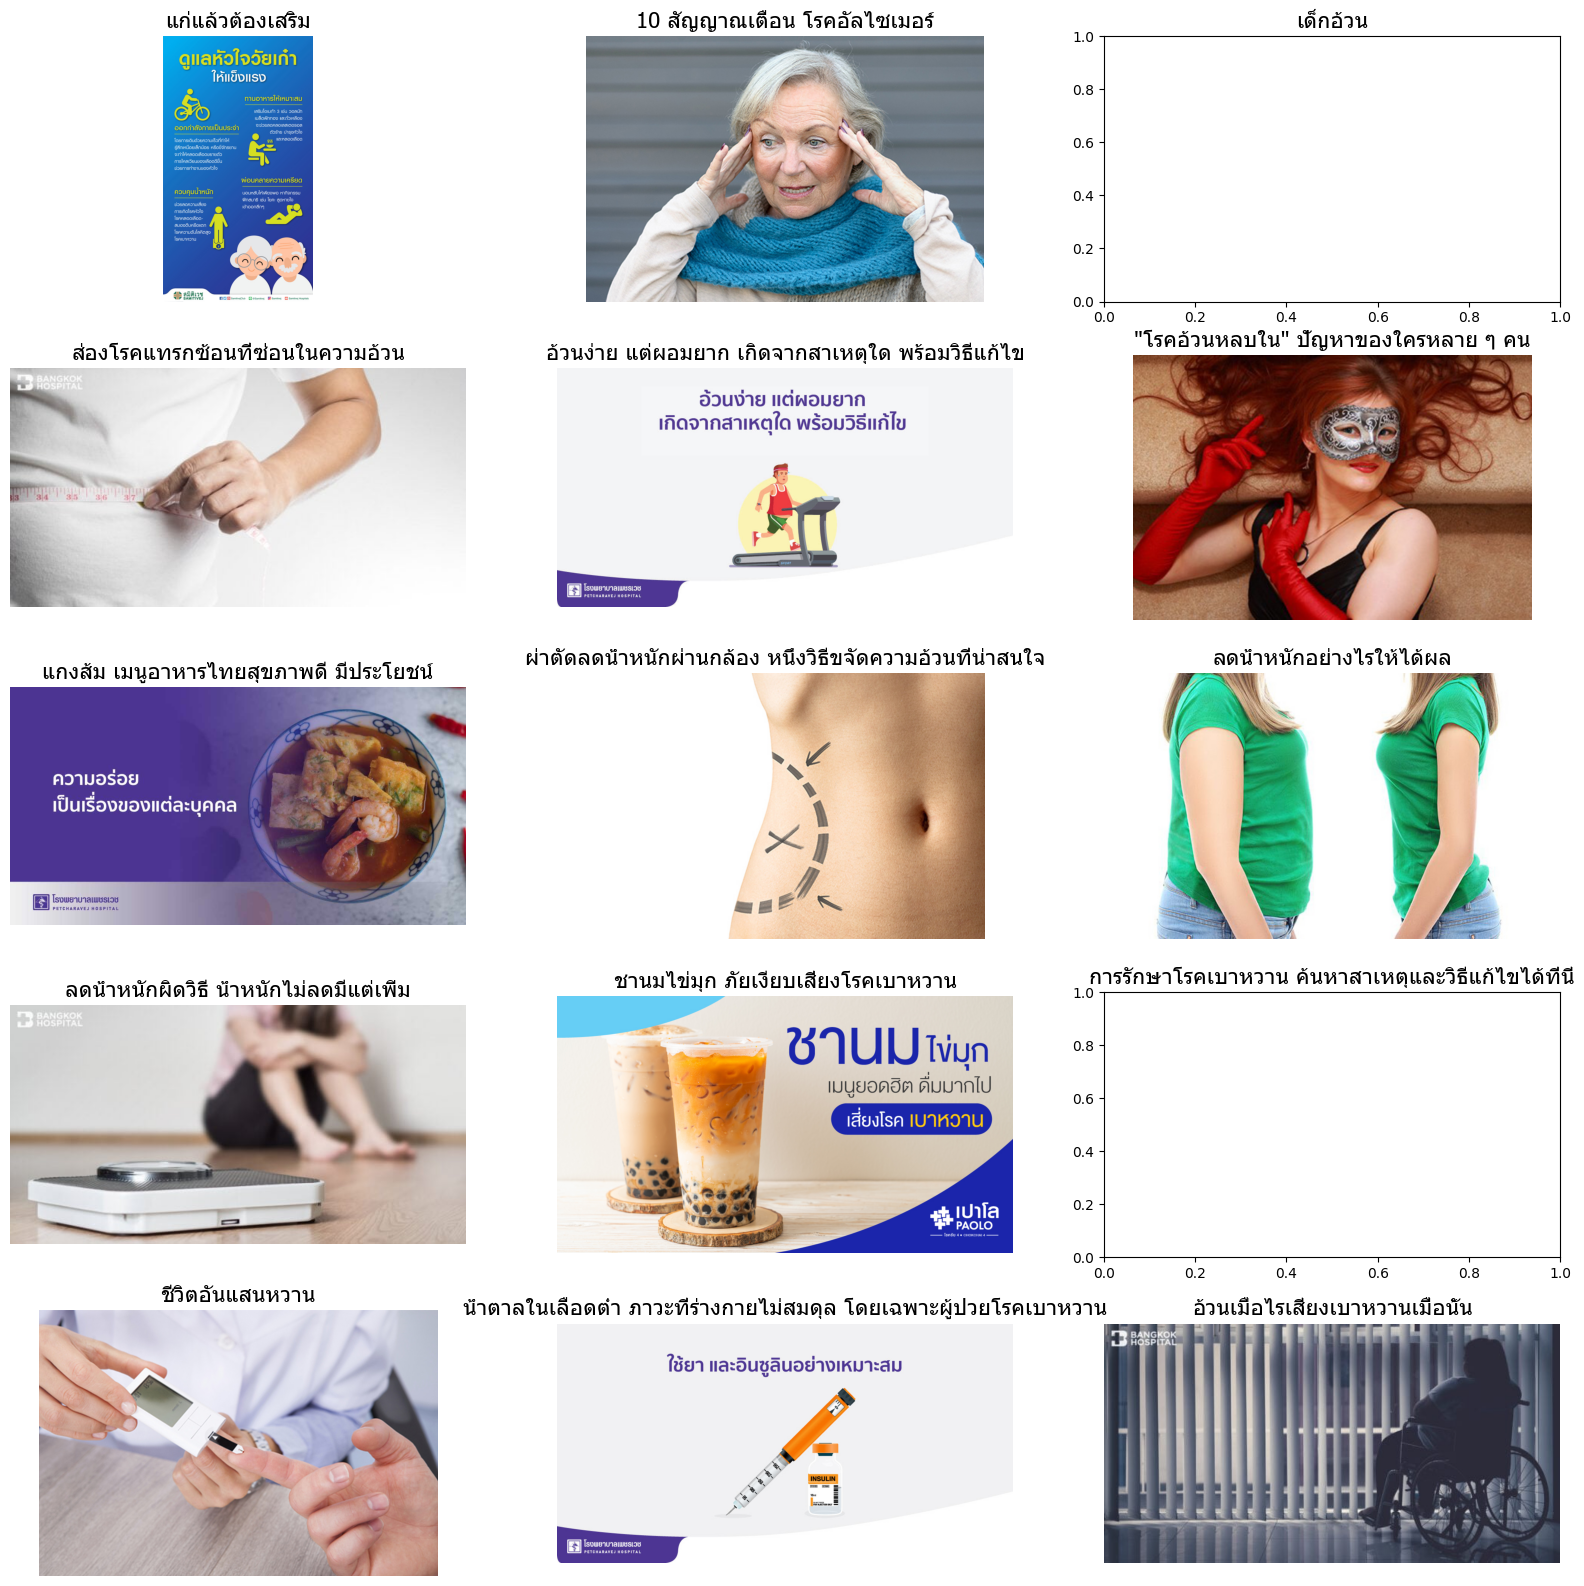

In [ ]:
visualize_articles_images(combine_df['title'],combine_df['banner'])

### splited text methed

In [ ]:
def split_text_recommend(user,clustered_df):
    global best_topic_model

    combine_df = pd.DataFrame()
    for text_to_predict in personal_check(user):

        if text_to_predict == '':
            continue

        text_to_predict_token = deepcut_tokenizer(text_to_predict)

        # Find topics
        try:
            similar_topics, similarity = best_topic_model.find_topics(text_to_predict_token, top_n=1)
        except:
            similar_topics, similarity = best_topic_model.find_topics(text_to_predict, top_n=1)

        # Print results
        print(f'The most similar child topic is {similar_topics[0]}, and the similarities is {np.round(similarity,3)[0]}')

        if np.round(similarity,3)[0] <= 0.35:
            print('---No matching articles---')
        else:
            # Example DataFrame
            similar_df = clustered_df[clustered_df['child_topic'] == similar_topics[0]]

            # Input text
            text_input = text_to_predict_token

            # TF-IDF vectorizer
            vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
            tfidf_matrix = vectorizer.fit_transform(similar_df['text_token'])

            # TF-IDF vector for input text
            text_tfidf = vectorizer.transform([text_input])

            # Compute cosine similarity
            similarity_scores = cosine_similarity(tfidf_matrix, text_tfidf)

            # Add similarity scores to DataFrame
            similar_df['Similarity'] = similarity_scores

        similar_df = similar_df.sort_values('Similarity', ascending=False)[['url','title','child_topic','Similarity','banner']].head(5)
        combine_df = pd.concat([combine_df,similar_df]).head(15)
    
    return combine_df.to_json(orient='records',force_ascii=False)

In [ ]:
split_df = pd.read_json(split_text_recommend(user_num,bertopic_clustered))
split_df

1/1 [==============================] - 0s 37ms/step
The most similar child topic is 65, and the similarities is 0.748
1/1 [==============================] - 0s 28ms/step
The most similar child topic is 97, and the similarities is 0.602
1/1 [==============================] - 0s 27ms/step
The most similar child topic is 94, and the similarities is 0.691
1/1 [==============================] - 0s 31ms/step
The most similar child topic is 40, and the similarities is 0.786


url   
0   https://www.samitivejhospitals.com/th/article/...  \
1   https://www.petcharavejhospital.com/th/Article...   
2   https://www.petcharavejhospital.com/th/Article...   
3   https://www.paolohospital.com/th-TH/center/Art...   
4   https://www.petcharavejhospital.com/th/Article...   
5   https://theworldmedicalhospital.com/th/new_sit...   
6   https://theworldmedicalhospital.com/th/new_sit...   
7   https://theworldmedicalhospital.com/th/new_sit...   
8   https://theworldmedicalhospital.com/th/new_sit...   
9   https://theworldmedicalhospital.com/th/new_sit...   
10  https://www.gj.mahidol.ac.th/main/paediatric-k...   
11  https://www.chulabhornchannel.com/health-artic...   
12  https://www.paolohospital.com/th-TH/center/Art...   
13  https://www.bangkokhospital.com/content/wrong-...   
14  https://www.bangkokhospital.com/content/laparo...   

                                                title  child_topic   
0              ปราบอาการท้องผูกในผู้สูงวัยให้อยู่หมัด           65  \
1    ขับถ่ายให้เป็นเวลา ช่วยลดความเสี่ยงอุจจาระอุดตัน           65   
2   ถุงผนังลำไส้อักเสบ กลั้นผายลมบ่อยๆ ก็มีความเสี...           65   
3       นิ่วในถุงน้ำดี กับรักษาด้วยการผ่าตัดส่องกล้อง           65   
4              มะเร็งลำไส้ใหญ่ สังเกตได้จากการขับถ่าย           65   
5                         น้ำเต้าหู้ กับ มะเร็งเต้านม           97   
6          เคล็ด (ไม่) ลับ ดูแลผิวอย่างไร ในวัยของคุณ           97   
7   “หินปูนเต้านม” เสี่ยงมะเร็งเต้านม ตรวจได้ด้วยแ...           97   
8   ความเครียดสะสม ภาวะอันตรายเสี่ยงซึมเศร้า เสียช...           97   
9                    ไขความจริง ฝ้า.. รักษาได้หรือไม่           97   
10                                           เด็กอ้วน           94   
11                       การดูแลตนเองเมื่อเป็นเบาหวาน           94   
12                              ภาวะน้ำตาลในเลือด สูง           94   
13            ลดน้ำหนักผิดวิธี น้ำหนักไม่ลดมีแต่เพิ่ม           94   
14  โรคอ้วนระบาดทั่วโลก แพทย์แนะเทคนิคตัดกระเพาะลด...           94   

    Similarity                                             banner  
0     0.722409  https://samitivej-prod-new-website.s3.ap-south...  
1     0.720688  https://www.petcharavejhospital.com/images/thu...  
2     0.717307  https://www.petcharavejhospital.com/images/thu...  
3     0.716460  https://www.paolohospital.com/Resource/Image/A...  
4     0.714574  https://www.petcharavejhospital.com/images/thu...  
5     0.525788  https://theworldmedicalhospital.com/images/amb...  
6     0.521677  https://theworldmedicalhospital.com/images/amb...  
7     0.506155  https://theworldmedicalhospital.com/images/amb...  
8     0.499502  https://theworldmedicalhospital.com/images/amb...  
9     0.497616  https://theworldmedicalhospital.com/images/amb...  
10    0.484813                                               None  
11    0.480412  https://www.chulabhornchannel.com/wp-content/u...  
12    0.476143  https://www.paolohospital.com/Resource/Image/A...  
13    0.474715  https://cdn.bangkokhospital.com/2020/04/IHL-D-...  
14    0.464040  https://cdn.bangkokhospital.com/2020/04/IHL-D-...

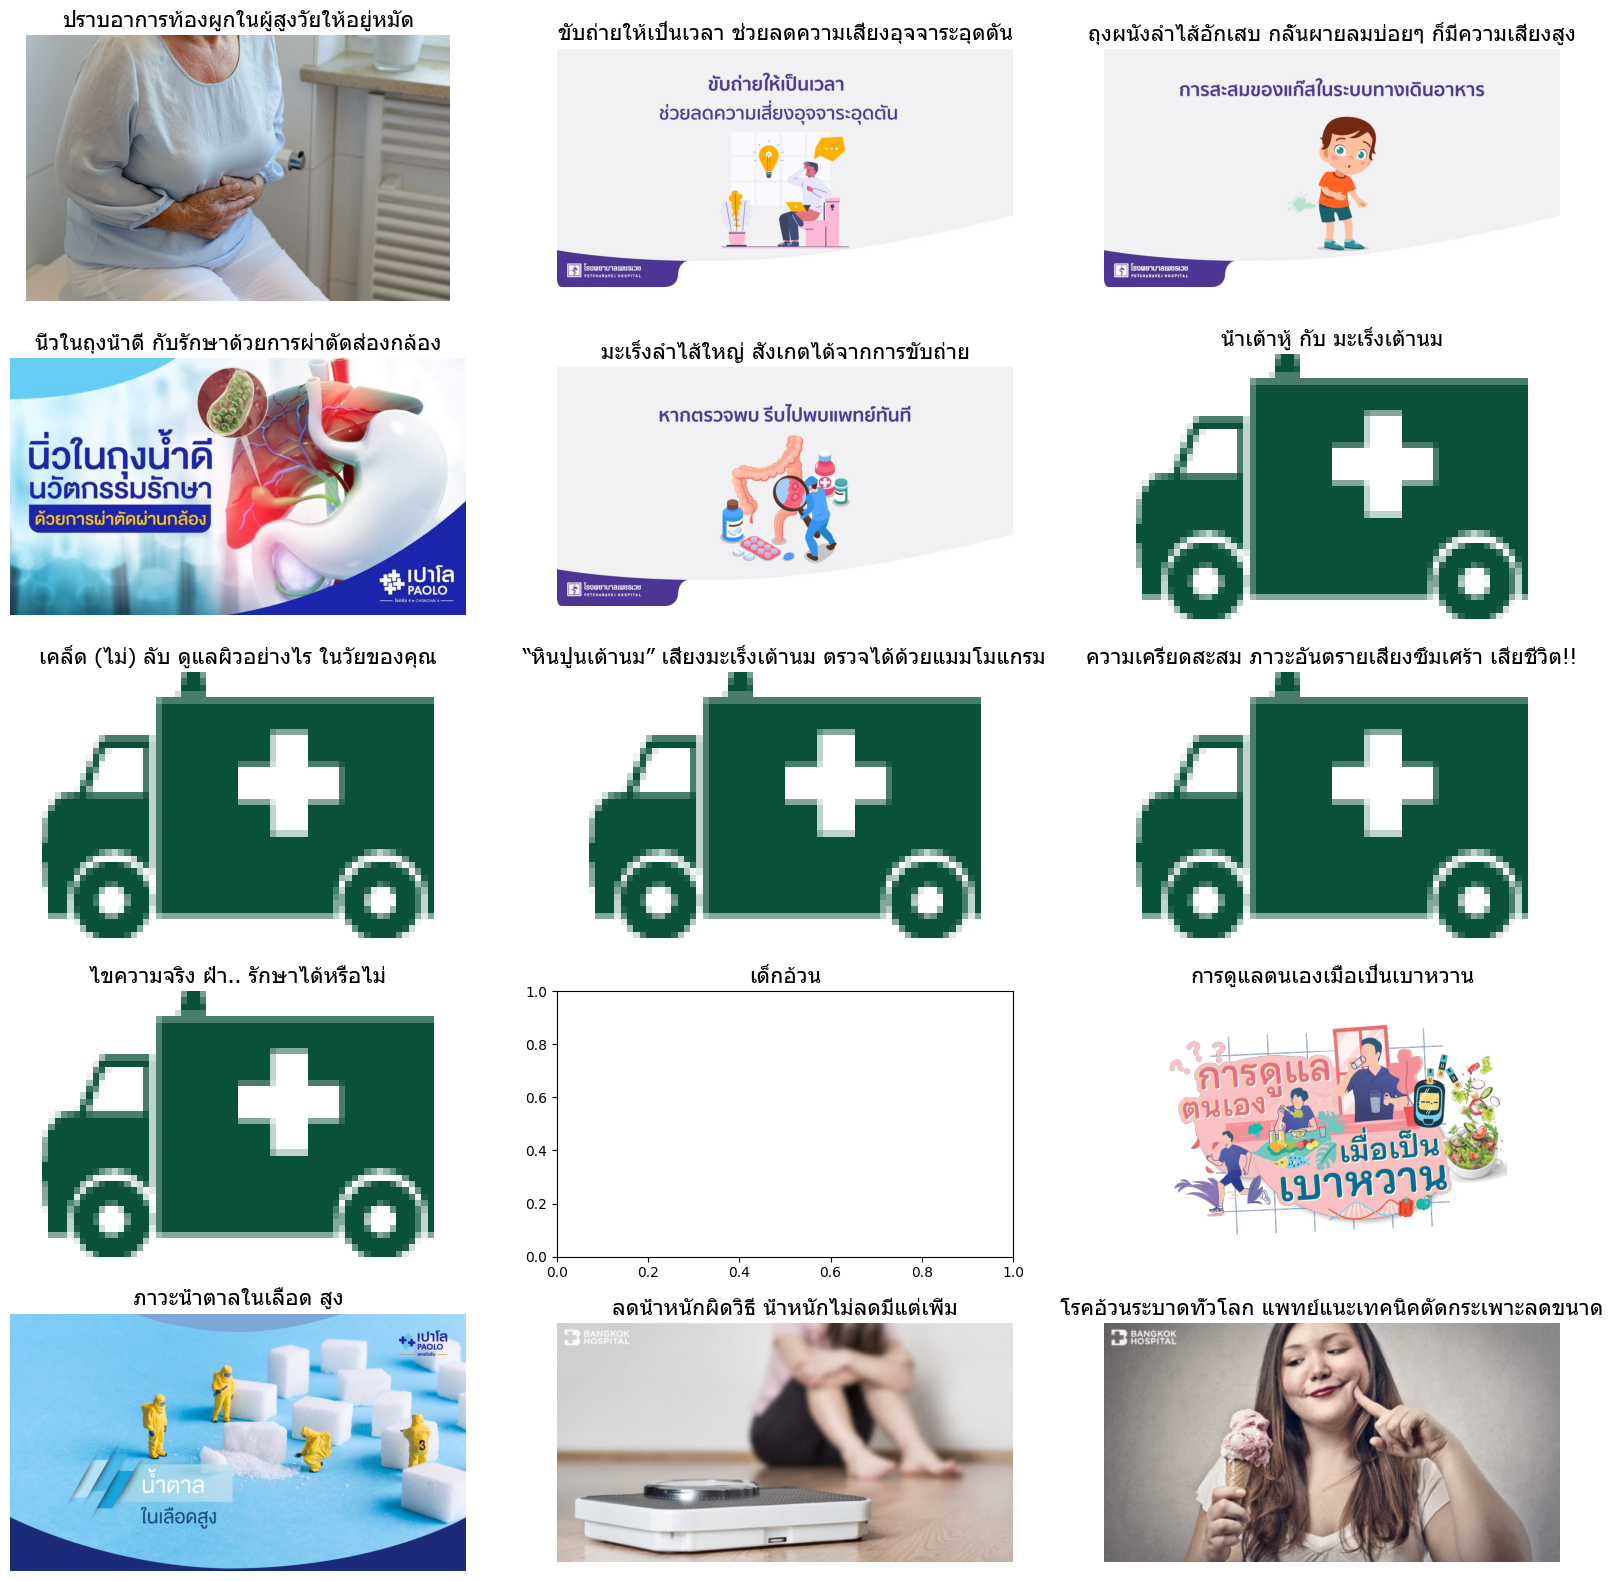

In [ ]:
visualize_articles_images(split_df['title'],split_df['banner'])

### container method

In [ ]:
def container_text_recommend(user,clustered_df):
    global best_topic_model

    age, gender, bmi, congentital_disease = personal_check(user)
    text_to_predict = age + gender + bmi + congentital_disease
    text_to_predict_token = deepcut_tokenizer(text_to_predict)

   ########################################################################################################################################
    similar_df = clustered_df[clustered_df['text_token'].apply(lambda x : x.replace(',','')).str.contains(congentital_disease)]

    # TF-IDF vectorizer
    vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
    tfidf_matrix = vectorizer.fit_transform(similar_df['text_token'])

    # TF-IDF vector for input text
    text_tfidf = vectorizer.transform([congentital_disease])

    # Compute cosine similarity
    similarity_scores = cosine_similarity(tfidf_matrix, text_tfidf)

    # Add similarity scores to DataFrame
    similar_df['Similarity'] = similarity_scores

    similar_1 = similar_df.sort_values('Similarity', ascending=False)[['url','title','child_topic','Similarity','banner']].head(5)

    ########################################################################################################################################
    # Find topics
    try:
        similar_topics, similarity = best_topic_model.find_topics(text_to_predict_token, top_n=1)
    except:
        similar_topics, similarity = best_topic_model.find_topics(text_to_predict, top_n=1)

    # Print results
    print(f'The most similar child topic is {similar_topics[0]}, and the similarities is {np.round(similarity,3)[0]}')

    if np.round(similarity,3)[0] <= 0.35:
        print('---No matching articles---')
    else:
        # Example DataFrame
        similar_df = pd.concat([clustered_df[clustered_df['child_topic'] == similar_topics[0]],clustered_df.iloc[similar_1.index]])

        # Input text
        text_input = text_to_predict_token

        # TF-IDF vectorizer
        vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
        tfidf_matrix = vectorizer.fit_transform(similar_df['text_token'])

        # TF-IDF vector for input text
        text_tfidf = vectorizer.transform([text_input])

        # Compute cosine similarity
        similarity_scores = cosine_similarity(tfidf_matrix, text_tfidf)

        # Add similarity scores to DataFrame
        similar_df['Similarity'] = similarity_scores

    similar_2 = similar_df.sort_values('Similarity', ascending=False)[['url','title','child_topic','Similarity','banner']].head(10)

    container_df = pd.concat([similar_1,similar_2]).sort_values('Similarity', ascending=False)

    return container_df.to_json(orient='records',force_ascii=False)


In [ ]:
comtain_df = pd.read_json(container_text_recommend(user_num,bertopic_clustered))
#comtain_df = pd.merge(source,comtain_df,on='url',how='inner').sort_values('Similarity', ascending=False)
comtain_df

2/2 [==============================] - 0s 6ms/step
The most similar child topic is 94, and the similarities is 0.577


url   
0   https://theworldmedicalhospital.com/th/new_sit...  \
1   https://theworldmedicalhospital.com/th/new_sit...   
2   https://www.samitivejhospitals.com/th/article/...   
3        https://www.bangpakok8.com/care_blog/view/38   
4   https://www.samitivejhospitals.com/th/article/...   
5   https://www.samitivejhospitals.com/th/article/...   
6   https://www.gj.mahidol.ac.th/main/paediatric-k...   
7   https://www.bangkokhospital.com/content/the-he...   
8   https://www.petcharavejhospital.com/th/Article...   
9   https://www.samitivejhospitals.com/th/article/...   
10  https://www.siphhospital.com/th/news/article/s...   
11  https://theworldmedicalhospital.com/th/new_sit...   
12  https://theworldmedicalhospital.com/th/new_sit...   
13       https://www.bangpakok8.com/care_blog/view/38   
14  https://www.samitivejhospitals.com/th/article/...   

                                                title  child_topic   
0   ไม่แก่ (เข่า)ก็เสื่อมได้  ถ้าคุณมีความเสี่ยงต่...           59  \
1              นี่ผมเป็น “ข้อเข่าเสื่อม” หรือเปล่าหมอ           59   
2                    6 สัญญาณเตือน อาการข้อเข่าเสื่อม           23   
3   ข้อเข่า...เดอะซีรี่ย์ EP1. สาเหตุที่เกิดอาการข...           68   
4                                    แก่แล้วต้องเสริม           94   
5                        10 สัญญาณเตือน โรคอัลไซเมอร์           94   
6                                            เด็กอ้วน           94   
7                    ส่องโรคแทรกซ้อนที่ซ่อนในความอ้วน           94   
8   อ้วนง่าย แต่ผอมยาก เกิดจากสาเหตุใด พร้อมวิธีแก้ไข           94   
9                 "โรคอ้วนหลบใน" ปัญหาของใครหลาย ๆ คน           94   
10    ไม่อยากข้อเข่าเสื่อม มาลองทำท่าบริหารข้อเข่ากัน            0   
11             นี่ผมเป็น “ข้อเข่าเสื่อม” หรือเปล่าหมอ           59   
12  ไม่แก่ (เข่า)ก็เสื่อมได้  ถ้าคุณมีความเสี่ยงต่...           59   
13  ข้อเข่า...เดอะซีรี่ย์ EP1. สาเหตุที่เกิดอาการข...           68   
14                   6 สัญญาณเตือน อาการข้อเข่าเสื่อม           23   

    Similarity                                             banner  
0     0.928894  https://theworldmedicalhospital.com/images/amb...  
1     0.921881  https://theworldmedicalhospital.com/images/amb...  
2     0.921676  https://samitivej-prod-new-website.s3.ap-south...  
3     0.909600  http://bangpakok8.com/upload/273152520_2390928...  
4     0.900977  https://samitivej-prod-new-website.s3.ap-south...  
5     0.890667  https://samitivej-prod-new-website.s3.ap-south...  
6     0.889199                                               None  
7     0.883110  https://cdn.bangkokhospital.com/2020/04/IHL-D-...  
8     0.882808  https://www.petcharavejhospital.com/images/thu...  
9     0.882130  https://samitivej-prod-new-website.s3.ap-south...  
10    0.608165  https://www.siphhospital.com/images/shared/log...  
11    0.581527  https://theworldmedicalhospital.com/images/amb...  
12    0.564522  https://theworldmedicalhospital.com/images/amb...  
13    0.536122  http://bangpakok8.com/upload/273152520_2390928...  
14    0.532916  https://samitivej-prod-new-website.s3.ap-south...

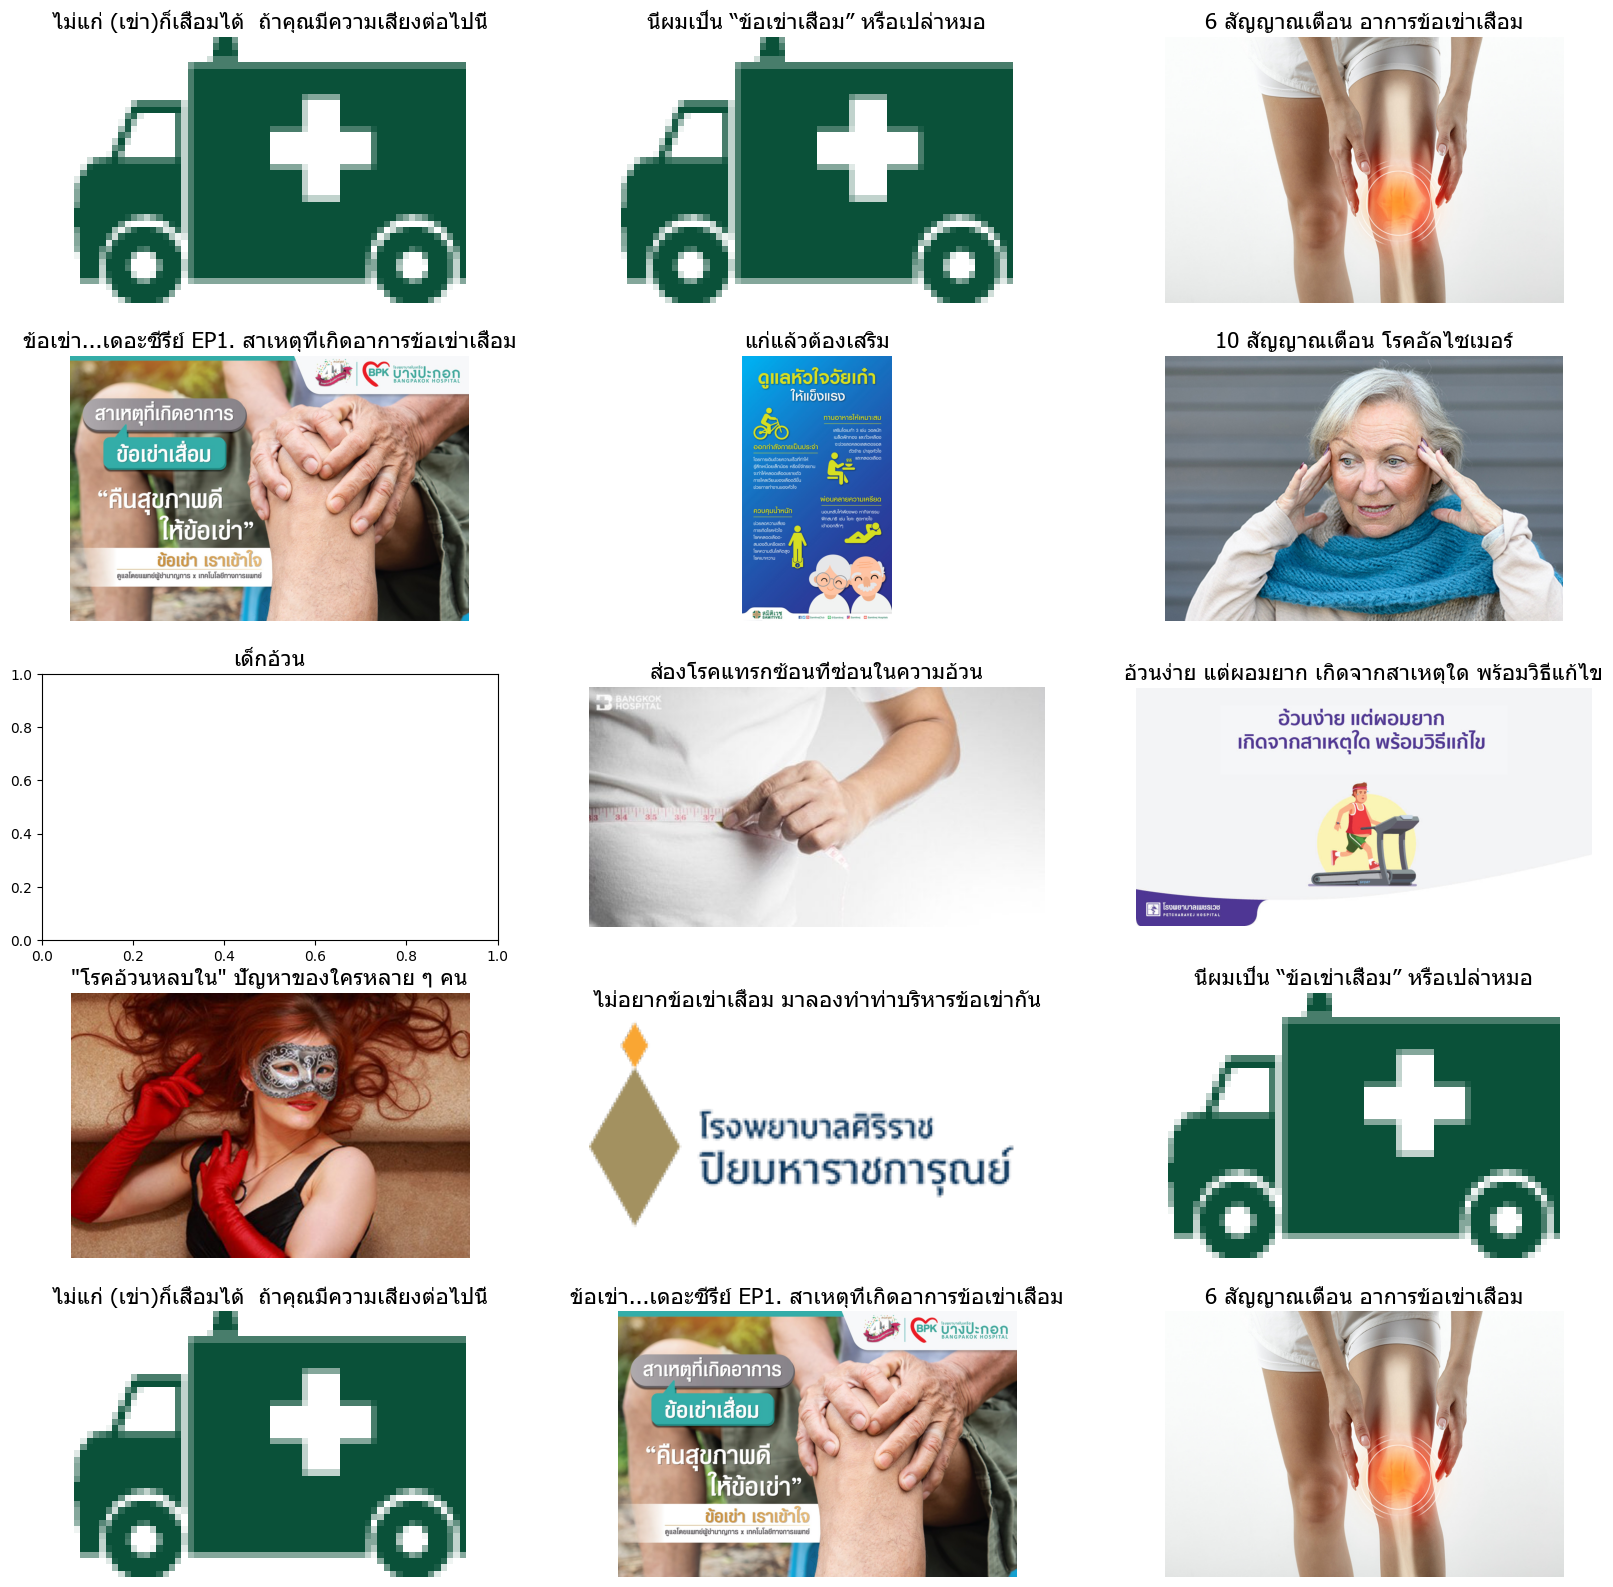

In [ ]:
visualize_articles_images(comtain_df['title'],comtain_df['banner'])

### semantic search + model

In [ ]:
user_num

gender                          หญิง
blood type                         B
birth date                1965-06-30
age                               58
weight                         101.9
height                         182.1
food allergy            ภูมิแพ้อาหาร
drug allergy                   ไม่มี
Congentital disease    ข้อเข่าเสื่อม
Name: 0, dtype: object

In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch

corpus = data['text_token'].apply(lambda x : x.replace(',',''))

In [ ]:
#corpus_embeddings = sbert_model.encode(corpus, convert_to_tensor=True,show_progress_bar=True,normalize_embeddings=True)

In [ ]:
import pickle

with open('corpus_embeddings.pickle', 'rb') as file:
    corpus_embeddings = pickle.load(file)

In [ ]:
def sbert_search(user,data_for_sbert,data_for_bert):
    age, gender, bmi, congentital_disease = personal_check(user)
    queries = [age + gender + bmi + congentital_disease]

    index_lst = []
    score_lst = []

    for query in queries:
        query_embedding = sbert_model.encode(query, convert_to_tensor=True)
        hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=15)
        hits = hits[0]
        for hit in hits:
            index_lst.append(hit['corpus_id'])
            score_lst.append(hit['score'])

    sbert_searched = data_for_sbert.iloc[index_lst]
    sbert_searched['Similarity'] = score_lst

    combine_met_df = combine_text_recommend(user,data_for_bert)
    all = pd.concat([sbert_searched,combine_met_df])

    text_to_predict = age + gender + bmi + congentital_disease
    text_input = deepcut_tokenizer(text_to_predict)

    # TF-IDF vectorizer
    vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
    tfidf_matrix = vectorizer.fit_transform(all['text_token'])

    # TF-IDF vector for input text
    text_tfidf = vectorizer.transform([text_input])

    # # Compute cosine similarity
    similarity_scores = cosine_similarity(tfidf_matrix, text_tfidf)

    # # Add similarity scores to DataFrame
    all['Similarity'] = similarity_scores

    all = all.sort_values('Similarity', ascending=False).head(15)

    return all

In [ ]:
sbert_searched = sbert_search(user_num,data,bertopic_clustered)

2/2 [==============================] - 0s 6ms/step
The most similar child topic is 94, and the similarities is 0.577
2/2 [==============================] - 0s 5ms/step


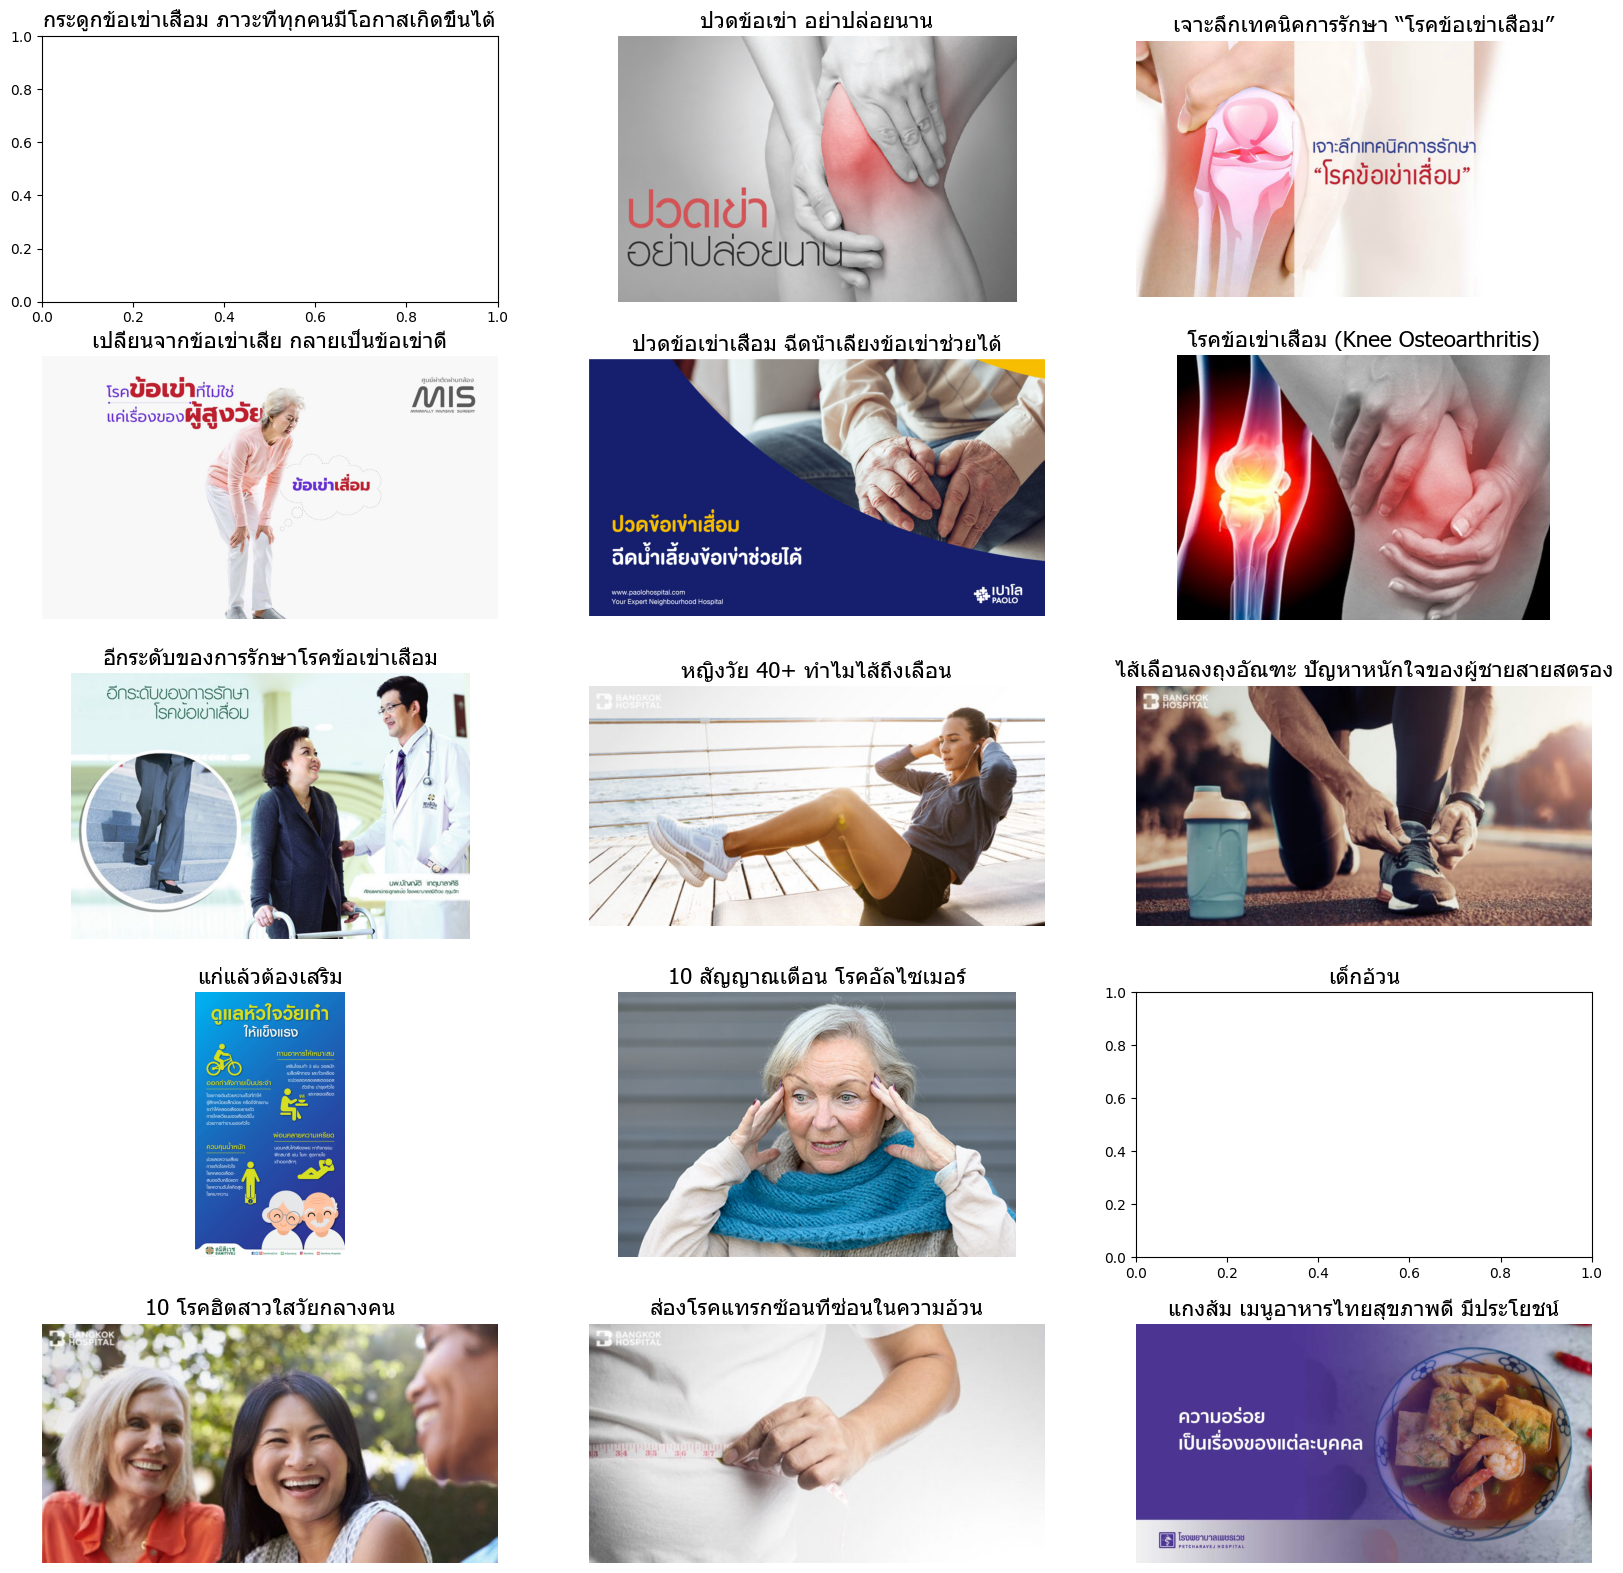

In [ ]:
visualize_articles_images(sbert_searched['title'],sbert_searched['banner'])

### load model

In [ ]:
#ใช้ตัวนี้ หรือตัวที่เทรนมาก็ได้ best_topic_model ถ้า load มีปัญหา
def split_text(text):
    return text.split(',')
loaded_model = BERTopic.load("Jiranuwat/topic_model")

In [ ]:
loaded_model.get_topic_info()

Topic  Count                                               Name   
0        0    340                        0_ โซน_ปัสสาวะ_ผ่าตัด_อาการ  \
1        1    195                             1_ยา_ภูมิแพ้_อาการ_โรค   
2        2     95            2_enewsletter_healthcare_ชีววัฒนะ_สำนัก   
3        3    134                   3_iop_โรงพยาบาลเวิลด_์เมดิคอล_ตา   
4        4     90                4_อาหาร_รับประทาน_จุลินทรีย์_น้ำมัน   
..     ...    ...                                                ...   
105    105     10  105_โฮม_httpswwwmylucknursinghomecomourservice...   
106    106     11                           106_ใหล_zone_heart_หัวใจ   
107    107     16                              107_ขอด_เลือด_ดำ_หลอด   
108    108     27                        108_tavi_สัน_ซีเมนต์_กระดูก   
109    109     12                             109_เลื่อน_vo_ขริบ_max   

                                        Representation  Representative_Docs  
0    [ โซน, ปัสสาวะ, ผ่าตัด, อาการ, ยา, ป่วย, ทำ, ร...                  NaN  
1    [ยา, ภูมิแพ้, อาการ, โรค, อาหาร, รับประทาน, หู...                  NaN  
2    [enewsletter, healthcare, ชีววัฒนะ, สำนัก, int...                  NaN  
3    [iop, โรงพยาบาลเวิลด, ์เมดิคอล, ตา,  โทร, โรงพ...                  NaN  
4    [อาหาร, รับประทาน, จุลินทรีย์, น้ำมัน, ผลไม้, ...                  NaN  
..                                                 ...                  ...  
105  [โฮม, httpswwwmylucknursinghomecomourservices,...                  NaN  
106  [ใหล, zone, heart, หัวใจ,  httpwwwcvriskcalcul...                  NaN  
107  [ขอด, เลือด, ดำ, หลอด, ขลิบ, เส้น, ฟอก, หมัน, ...                  NaN  
108  [tavi, สัน, ซีเมนต์, กระดูก, ข้อ, สะโพก, ผ่าตั...                  NaN  
109  [เลื่อน, vo, ขริบ, max, ไหล่, หนีบ, prp, ไส้, ...                  NaN  

[110 rows x 5 columns]